<a href="https://colab.research.google.com/github/Cynthiaudoye/Forex_Trading_Bot/blob/main/Cynthia_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="width:100%; height:100px; border: 0;">
    <tr style="border: 0;">
        <td style="border: 0; vertical-align: middle; text-align: center;">
            <h1 style="margin: 0;">Development of an Automated GBP/USD Forex Trading Bot Using ML Algorithms: Phase 1</h1>
        </td>
    </tr>
</table>


**Research Question**: How can machine learning algorithms (GRU, XGBoost, and Random Forest) be compared to develop the most profitable automated trading bot for the GBP/USD Forex market?

### Objective 1. Collect, preprocess historical Forex data for GBP/USD and perform EDA to understand & identify patterns

In [1]:
# Installing the TensorFlow library, which is used for machine learning and neural network tasks
!pip install tensorflow

In [2]:
# Importing necessary libraries
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import random
import tensorflow as tf
import matplotlib.dates as mdates
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import save_model, load_model
from joblib import dump, load

In [3]:
# Ensure Google Drive is mounted
drive.mount('/content/drive', force_remount=True)

# Navigate to your dataset folder in Google Drive
os.chdir('/content/drive/My Drive/Ms.c Data Science project')


Mounted at /content/drive


In [4]:
# Reading the data into the dataframe from CSV
fx_df = pd.read_csv('GBPUSD_HistoricalData.csv')

# Displaying the first few rows
fx_df.head()

Date      Open      High       Low     Close  Adj Close  Volume
0  2003-12-01  1.723811  1.727205  1.718390  1.718597   1.718597     0.0
1  2003-12-02  1.719010  1.732112  1.717298  1.730313   1.730313     0.0
2  2003-12-03  1.730493  1.731812  1.725209  1.728101   1.728101     0.0
3  2003-12-04  1.727414  1.728997  1.718302  1.720697   1.720697     0.0
4  2003-12-05  1.720608  1.733102  1.719809  1.733102   1.733102     0.0

In [5]:
# Displaying the last few rows
fx_df.tail()

Date      Open      High       Low     Close  Adj Close  Volume
5343  2024-05-23  1.272087  1.274697  1.270616  1.272103   1.272103     0.0
5344  2024-05-24  1.269374  1.275136  1.268279  1.269406   1.269406     0.0
5345  2024-05-27  1.273447  1.277900  1.273447  1.273610   1.273610     0.0
5346  2024-05-28  1.277270  1.279984  1.276308  1.277237   1.277237     0.0
5347  2024-05-29  1.276000  1.277172  1.270713  1.275836   1.275836     0.0

In [6]:
# Retrieving the number of rows and columns in the dataset
rows, columns = fx_df.shape
rows, columns

(5348, 7)

In [7]:
# Generating summary statistics for the dataset
summary_stats = fx_df.describe()
summary_stats

Open         High          Low        Close    Adj Close  Volume
count  5331.000000  5331.000000  5331.000000  5331.000000  5331.000000  5331.0
mean      1.534185     1.539940     1.528029     1.534222     1.534222     0.0
std       0.239738     0.240472     0.239447     0.239771     0.239771     0.0
min       1.072846     1.083541     0.637389     1.072754     1.072754     0.0
25%       1.309955     1.314311     1.305364     1.310049     1.310049     0.0
50%       1.536098     1.542829     1.530339     1.536169     1.536169     0.0
75%       1.681011     1.684409     1.678402     1.680983     1.680983     0.0
max       2.108415     2.115820     2.098812     2.108192     2.108192     0.0

In [8]:
# Getting an overview of the DataFrame structure, data types, and detect missing values
fx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5348 entries, 0 to 5347
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5348 non-null   object 
 1   Open       5331 non-null   float64
 2   High       5331 non-null   float64
 3   Low        5331 non-null   float64
 4   Close      5331 non-null   float64
 5   Adj Close  5331 non-null   float64
 6   Volume     5331 non-null   float64
dtypes: float64(6), object(1)
memory usage: 292.6+ KB


In [9]:
# Just to reconfirm the missing values in dataframe
fx_df.isnull().sum()

Date          0
Open         17
High         17
Low          17
Close        17
Adj Close    17
Volume       17
dtype: int64

In [10]:
# Filtering out the rows that contain null values
null_rows = fx_df[fx_df.isnull().any(axis=1)]
null_rows

Date  Open  High  Low  Close  Adj Close  Volume
238   2004-10-28   NaN   NaN  NaN    NaN        NaN     NaN
472   2005-09-21   NaN   NaN  NaN    NaN        NaN     NaN
985   2007-09-10   NaN   NaN  NaN    NaN        NaN     NaN
1040  2007-11-26   NaN   NaN  NaN    NaN        NaN     NaN
1056  2007-12-18   NaN   NaN  NaN    NaN        NaN     NaN
1057  2007-12-19   NaN   NaN  NaN    NaN        NaN     NaN
1079  2008-01-18   NaN   NaN  NaN    NaN        NaN     NaN
1080  2008-01-21   NaN   NaN  NaN    NaN        NaN     NaN
1081  2008-01-22   NaN   NaN  NaN    NaN        NaN     NaN
1131  2008-04-01   NaN   NaN  NaN    NaN        NaN     NaN
1153  2008-05-01   NaN   NaN  NaN    NaN        NaN     NaN
1196  2008-07-01   NaN   NaN  NaN    NaN        NaN     NaN
1924  2011-04-15   NaN   NaN  NaN    NaN        NaN     NaN
2571  2013-10-08   NaN   NaN  NaN    NaN        NaN     NaN
3551  2017-07-11   NaN   NaN  NaN    NaN        NaN     NaN
3643  2017-11-16   NaN   NaN  NaN    NaN        NaN     NaN
4037  2019-05-22   NaN   NaN  NaN    NaN        NaN     NaN

In [11]:
# Removing rows with the NaN values, 'Volume' and 'Adj Close' columns and reconfirming number of rows and columns in the dataset
fx_cleaned_df = fx_df.dropna()
fx_cleaned_df = fx_cleaned_df.drop(columns=['Volume', 'Adj Close'])

fx_cleaned_df.shape

(5331, 5)

In [12]:
# Convert the date column to datetime format
fx_cleaned_df['Date'] = pd.to_datetime(fx_cleaned_df['Date'])

In [13]:
# Getting an overview of the cleaned DataFrame structure and data types
fx_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5331 entries, 0 to 5347
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5331 non-null   datetime64[ns]
 1   Open    5331 non-null   float64       
 2   High    5331 non-null   float64       
 3   Low     5331 non-null   float64       
 4   Close   5331 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 249.9 KB


In [14]:
# Displaying the first few rows of the cleaned dataframe
fx_cleaned_df.head()

Date      Open      High       Low     Close
0 2003-12-01  1.723811  1.727205  1.718390  1.718597
1 2003-12-02  1.719010  1.732112  1.717298  1.730313
2 2003-12-03  1.730493  1.731812  1.725209  1.728101
3 2003-12-04  1.727414  1.728997  1.718302  1.720697
4 2003-12-05  1.720608  1.733102  1.719809  1.733102

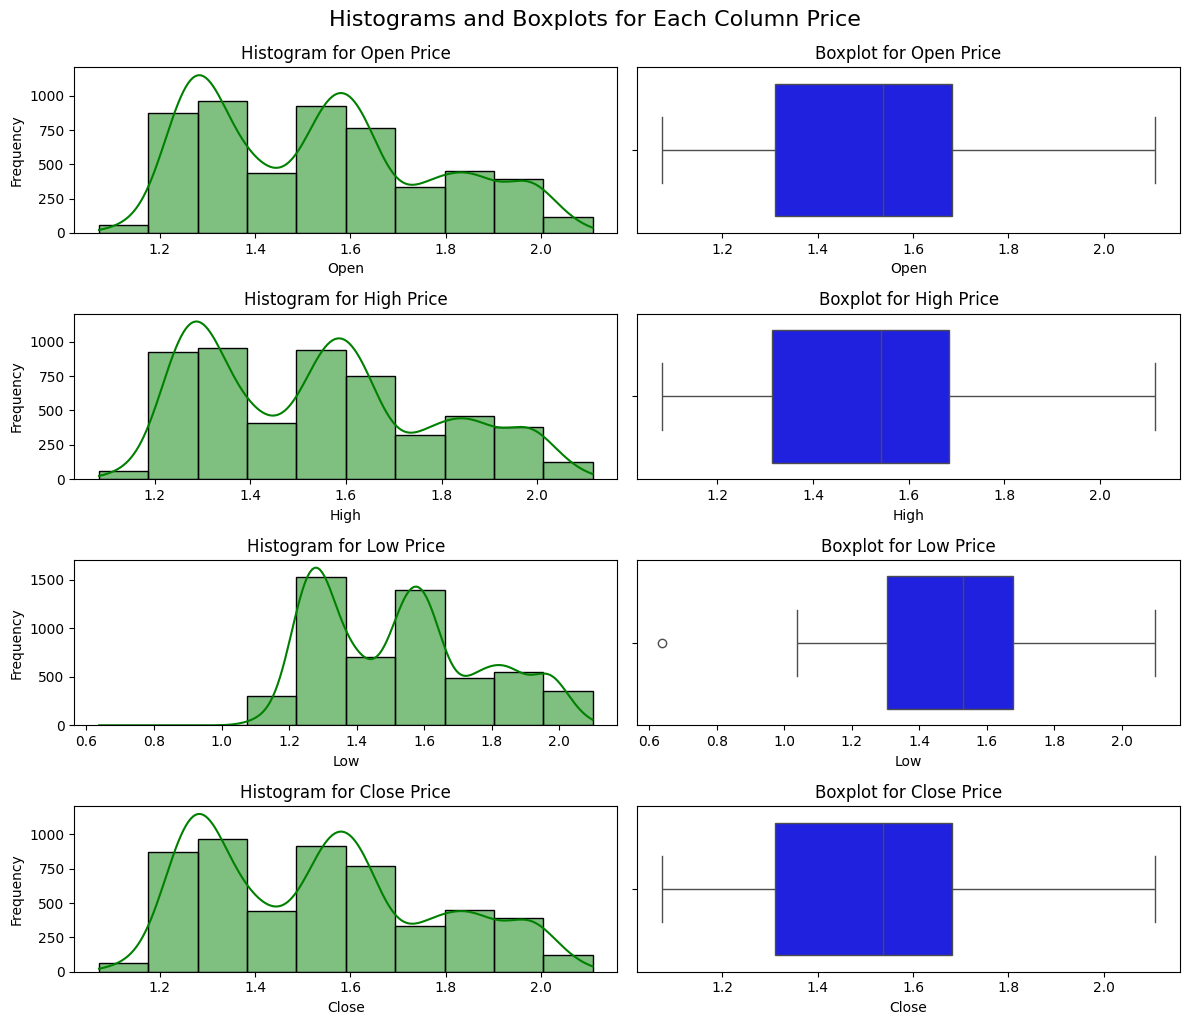

In [15]:
# Creating a figure and a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))

# Defining the columns for histograms
numeric_columns = ['Open', 'High', 'Low', 'Close']

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Looping through the numeric columns and then creating a histogram and boxplot for each
for i, col in enumerate(numeric_columns):
    sns.histplot(fx_cleaned_df[col], kde=True, color='green', bins=10, ax=axes[2*i])
    axes[2*i].set_xlabel(col.capitalize())
    axes[2*i].set_ylabel('Frequency')
    axes[2*i].set_title(f"Histogram for {col.capitalize()} Price")


    sns.boxplot(x=fx_cleaned_df[col], ax=axes[2*i+1], color='blue')
    axes[2*i+1].set_xlabel(col.capitalize())
    axes[2*i+1].set_title(f"Boxplot for {col.capitalize()} Price")

# Adjusting layout for better spacing between plots
plt.tight_layout()

# Adding main title for the entire figure
plt.suptitle("Histograms and Boxplots for Each Column Price", fontsize=16, y=1.02)

# Displaying the plot
plt.show()

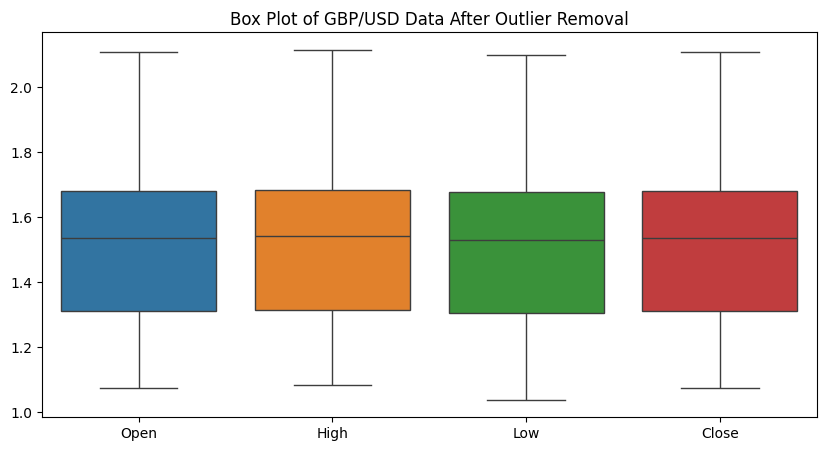

In [16]:
# Defining a function to remove outliers using IQR(Inter qurtile range)
def remove_outliers_iqr(fx_cleaned_df, columns):

  """
    Removes outliers from specified columns in a DataFrame using the IQR method.

    Parameters:
    fx_cleaned_df: The DataFrame containing the data.
    columns (list): A list of column names from which to remove outliers.

    Returns:
    fx_cleaned_df2: A new DataFrame with outliers removed from the specified columns.
    """

  for column in columns:
        Q1 = fx_cleaned_df[column].quantile(0.25)
        Q3 = fx_cleaned_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        fx_cleaned_df = fx_cleaned_df[(fx_cleaned_df[column] >= lower_bound) & (fx_cleaned_df[column] <= upper_bound)]
  return fx_cleaned_df

# Applying the function to the price columns
price_columns = ['Open', 'High', 'Low', 'Close']
fx_cleaned_df2 = remove_outliers_iqr(fx_cleaned_df, price_columns)

# Visualizing the data after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=fx_cleaned_df2[price_columns])
plt.title('Box Plot of GBP/USD Data After Outlier Removal')
plt.show()

In [17]:
# Retrieving the number of rows and columns in the new dataframe after removing outliers
rows, columns = fx_cleaned_df2.shape
rows, columns

(5330, 5)

In [18]:
# Generating summary statistics for the new GBP/USD data
summary_stats = fx_cleaned_df2.describe()
summary_stats

Date         Open         High          Low  \
count                           5330  5330.000000  5330.000000  5330.000000   
mean   2014-03-05 00:17:01.238273792     1.534178     1.539934     1.528196   
min              2003-12-01 00:00:00     1.072846     1.083541     1.037904   
25%              2009-01-23 18:00:00     1.309934     1.314298     1.305458   
50%              2014-03-08 12:00:00     1.536098     1.542615     1.530397   
75%              2019-04-18 18:00:00     1.681011     1.684409     1.678465   
max              2024-05-29 00:00:00     2.108415     2.115820     2.098812   
std                              NaN     0.239760     0.240494     0.239159   

             Close  
count  5330.000000  
mean      1.534216  
min       1.072754  
25%       1.309989  
50%       1.536134  
75%       1.680997  
max       2.108192  
std       0.239793

In [19]:
# Calculating the Exponential Moving Average (EMAs) with a customizable period
def calculate_ema(data, span):
    """
    Calculate the Exponential Moving Average (EMA) for a given dataset and span.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing 'Close' prices.
    span (int): The number of periods to use for calculating the EMA.

    Returns:
    pd.Series: A pandas Series containing the EMA values.
    """
    return data.ewm(span=span, adjust=False).mean()

# Calculates 20-day and 50-day EMAs
fx_cleaned_df2['EMA_20'] = calculate_ema(fx_cleaned_df2['Close'], span=20)
fx_cleaned_df2['EMA_50'] = calculate_ema(fx_cleaned_df2['Close'], span=50)

In [20]:
# Calculating the Relative Strength Index (RSI) with a customizable period
def calculate_rsi(data, window):
    """
    Calculate the Relative Strength Index (RSI) for a given dataset and window.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing 'Close' prices.
    window (int): The number of periods to use for calculating the RSI.

    Returns:
    pd.Series: A pandas Series containing the RSI values.
    """
    # Calculates the change in price
    delta = data['Close'].diff(1)

    # Separates the gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculates the rolling average gain and loss
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calculates the Relative Strength (RS)
    rs = avg_gain / avg_loss

    # Calculates the Relative Strength Index (RSI)
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Defaults to 14-day RSI
fx_cleaned_df2['RSI'] = calculate_rsi(fx_cleaned_df2, window=14)

# Handling the NaNs in the first row
fx_cleaned_df2['RSI'].fillna(0, inplace=True)


In [21]:
# Calculating the MACD Line, Signal Line, and MACD Histogram
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    """
    Calculate the MACD line, Signal line, and MACD histogram for a given dataset.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing 'Close' prices.
    short_window (int): The number of periods for the short-term EMA. Default is 12.
    long_window (int): The number of periods for the long-term EMA. Default is 26.
    signal_window (int): The number of periods for the Signal line EMA. Default is 9.

    Returns:
    pd.DataFrame: A DataFrame containing the MACD line, Signal line, and MACD histogram.
    """
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    macd_histogram = macd_line - signal_line

    return pd.DataFrame({
        'MACD_Line': macd_line,
        'Signal_Line': signal_line,
        'MACD_Histogram': macd_histogram
    })

# Calculating MACD
macd = calculate_macd(fx_cleaned_df2)
fx_cleaned_df2 = fx_cleaned_df2.join(macd)

# Displaying the processed data
print(fx_cleaned_df2[['Date', 'Close', 'EMA_20', 'EMA_50', 'RSI', 'MACD_Line', 'Signal_Line', 'MACD_Histogram']].head())


        Date     Close    EMA_20    EMA_50         RSI  MACD_Line  \
0 2003-12-01  1.718597  1.718597  1.718597    0.000000   0.000000   
1 2003-12-02  1.730313  1.719713  1.719056  100.000000   0.000935   
2 2003-12-03  1.728101  1.720512  1.719411   84.118323   0.001480   
3 2003-12-04  1.720697  1.720529  1.719462   54.922183   0.001299   
4 2003-12-05  1.733102  1.721727  1.719996   71.497169   0.002133   

   Signal_Line  MACD_Histogram  
0     0.000000        0.000000  
1     0.000187        0.000748  
2     0.000445        0.001034  
3     0.000616        0.000683  
4     0.000920        0.001213  


In [22]:
# Displaying the processed data
fx_cleaned_df2.head()

Date      Open      High       Low     Close    EMA_20    EMA_50  \
0 2003-12-01  1.723811  1.727205  1.718390  1.718597  1.718597  1.718597   
1 2003-12-02  1.719010  1.732112  1.717298  1.730313  1.719713  1.719056   
2 2003-12-03  1.730493  1.731812  1.725209  1.728101  1.720512  1.719411   
3 2003-12-04  1.727414  1.728997  1.718302  1.720697  1.720529  1.719462   
4 2003-12-05  1.720608  1.733102  1.719809  1.733102  1.721727  1.719996   

          RSI  MACD_Line  Signal_Line  MACD_Histogram  
0    0.000000   0.000000     0.000000        0.000000  
1  100.000000   0.000935     0.000187        0.000748  
2   84.118323   0.001480     0.000445        0.001034  
3   54.922183   0.001299     0.000616        0.000683  
4   71.497169   0.002133     0.000920        0.001213

In [24]:
# Customising the filtering option of dataset from the dataframe for visualization
start_date = '2020-11-01'
end_date = '2024-05-29'
filtered_data = fx_cleaned_df2[(fx_cleaned_df2['Date'] >= start_date) & (fx_cleaned_df2['Date'] <= end_date)]

# Display the filtered data
print(filtered_data.head())

           Date      Open      High       Low     Close    EMA_20    EMA_50  \
4415 2020-11-02  1.292708  1.294247  1.285678  1.292674  1.297790  1.295797   
4416 2020-11-03  1.292400  1.307702  1.291606  1.292390  1.297276  1.295663   
4417 2020-11-04  1.313267  1.313767  1.291789  1.312164  1.298694  1.296310   
4418 2020-11-05  1.296109  1.313249  1.294264  1.296680  1.298502  1.296325   
4419 2020-11-06  1.313836  1.317593  1.309552  1.313940  1.299972  1.297016   

            RSI  MACD_Line  Signal_Line  MACD_Histogram  
4415  41.148679   0.000809     0.001356       -0.000547  
4416  49.135506   0.000276     0.001140       -0.000864  
4417  57.020790   0.001433     0.001198        0.000234  
4418  53.934127   0.001087     0.001176       -0.000089  
4419  60.913056   0.002181     0.001377        0.000804  


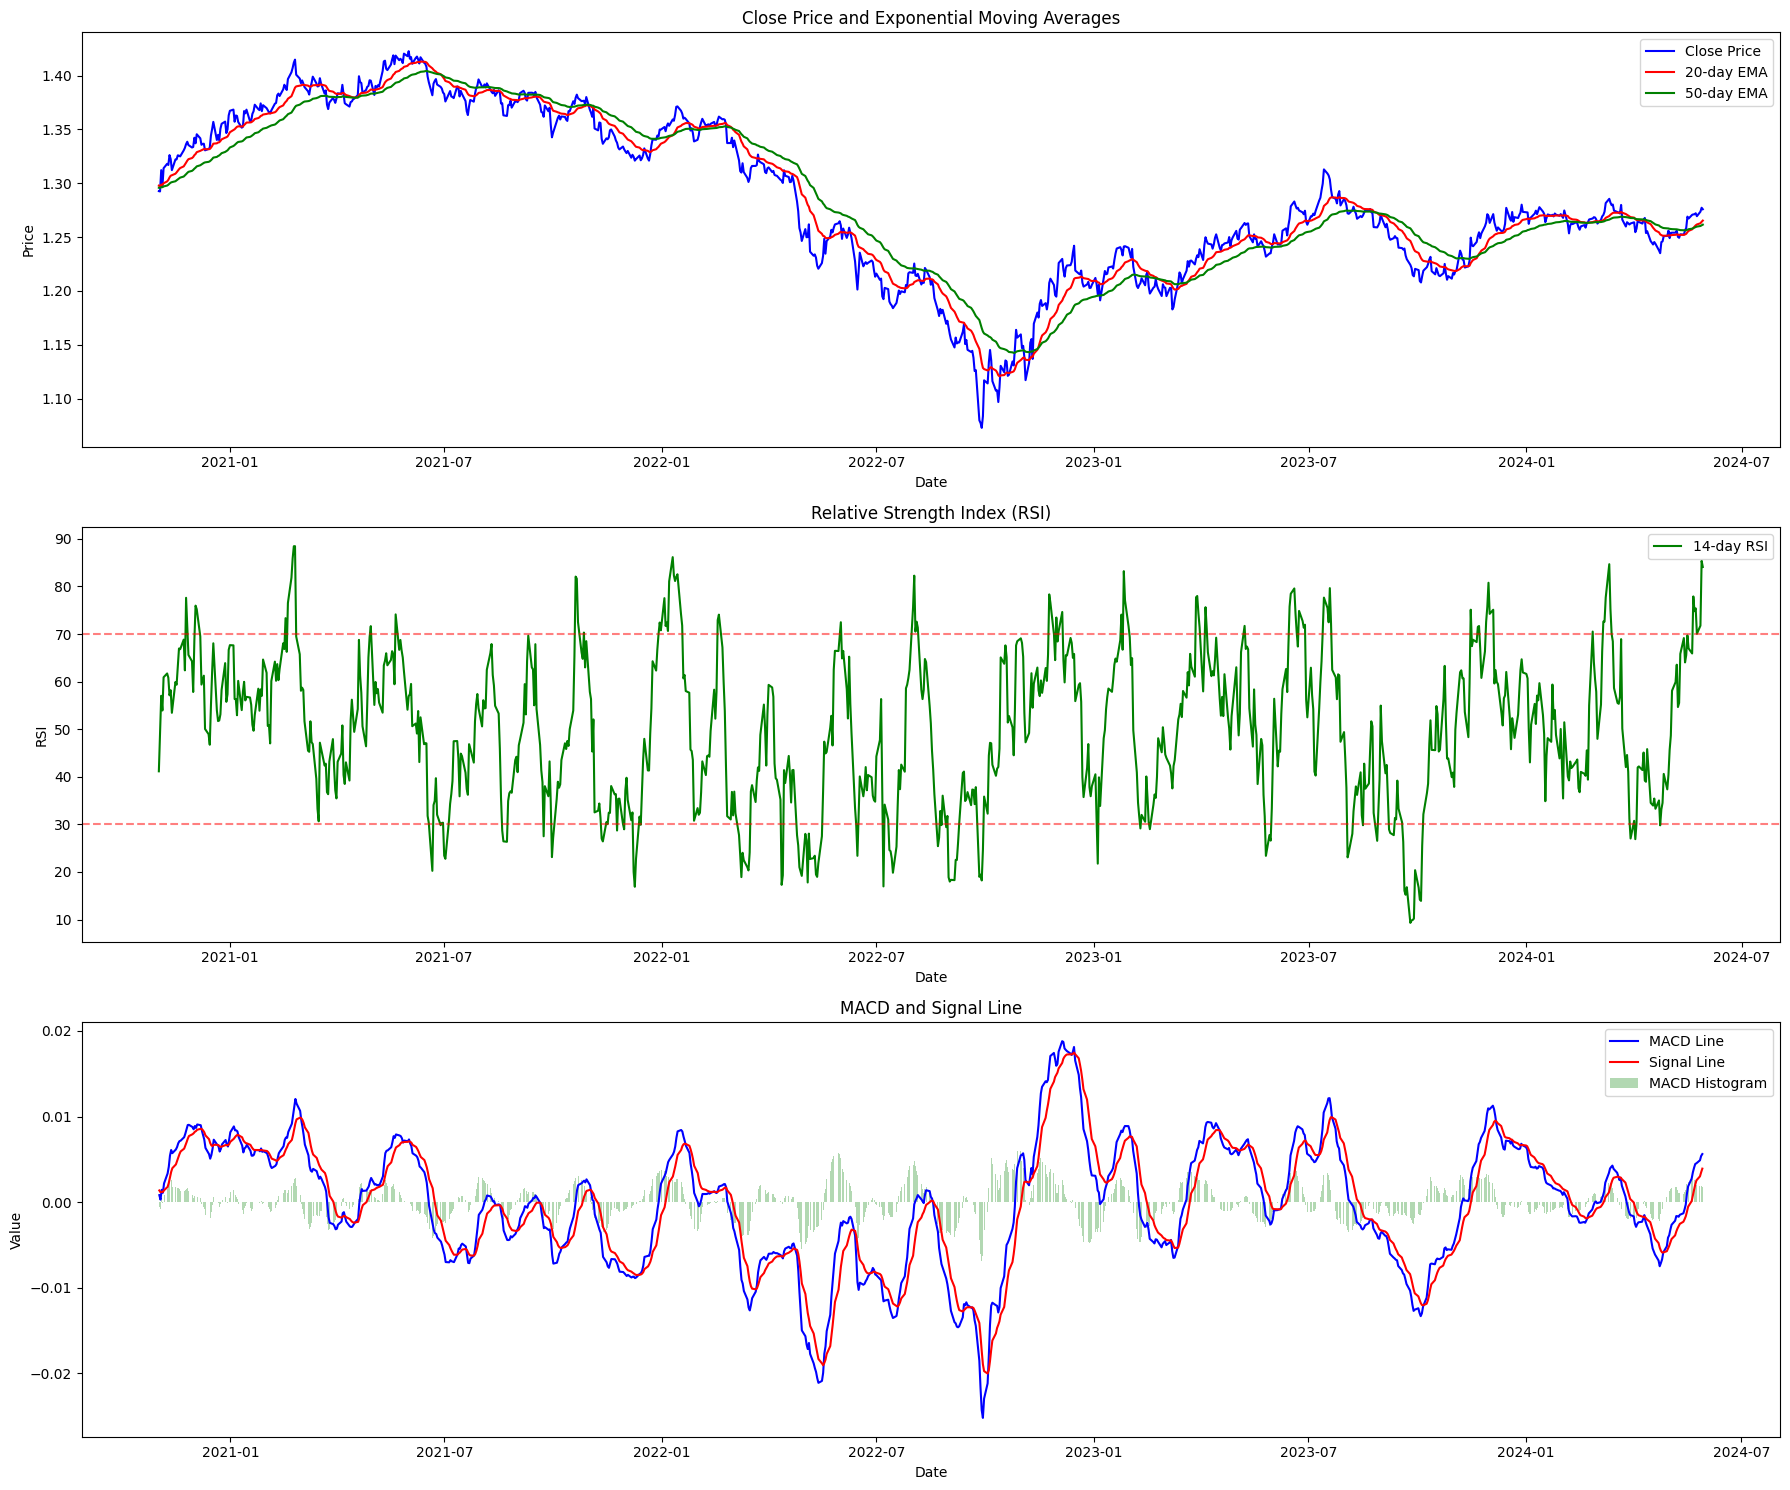

In [25]:
# Plot the Close price, EMAs, RSI, and MACD
plt.figure(figsize=(18, 15))

# Close Price and EMAs
plt.subplot(3, 1, 1)
plt.plot(filtered_data.Date, filtered_data['Close'], label='Close Price', color='blue')
plt.plot(filtered_data.Date, filtered_data['EMA_20'], label='20-day EMA', color='red')
plt.plot(filtered_data.Date, filtered_data['EMA_50'], label='50-day EMA', color='green')
plt.title('Close Price and Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# RSI
plt.subplot(3, 1, 2)
plt.plot(filtered_data.Date, filtered_data['RSI'], label='14-day RSI', color='green')
plt.axhline(30, linestyle='--', alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(filtered_data.Date, filtered_data['MACD_Line'], label='MACD Line', color='blue')
plt.plot(filtered_data.Date, filtered_data['Signal_Line'], label='Signal Line', color='red')
plt.bar(filtered_data.Date, filtered_data['MACD_Histogram'], label='MACD Histogram', color='green', alpha=0.3)
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

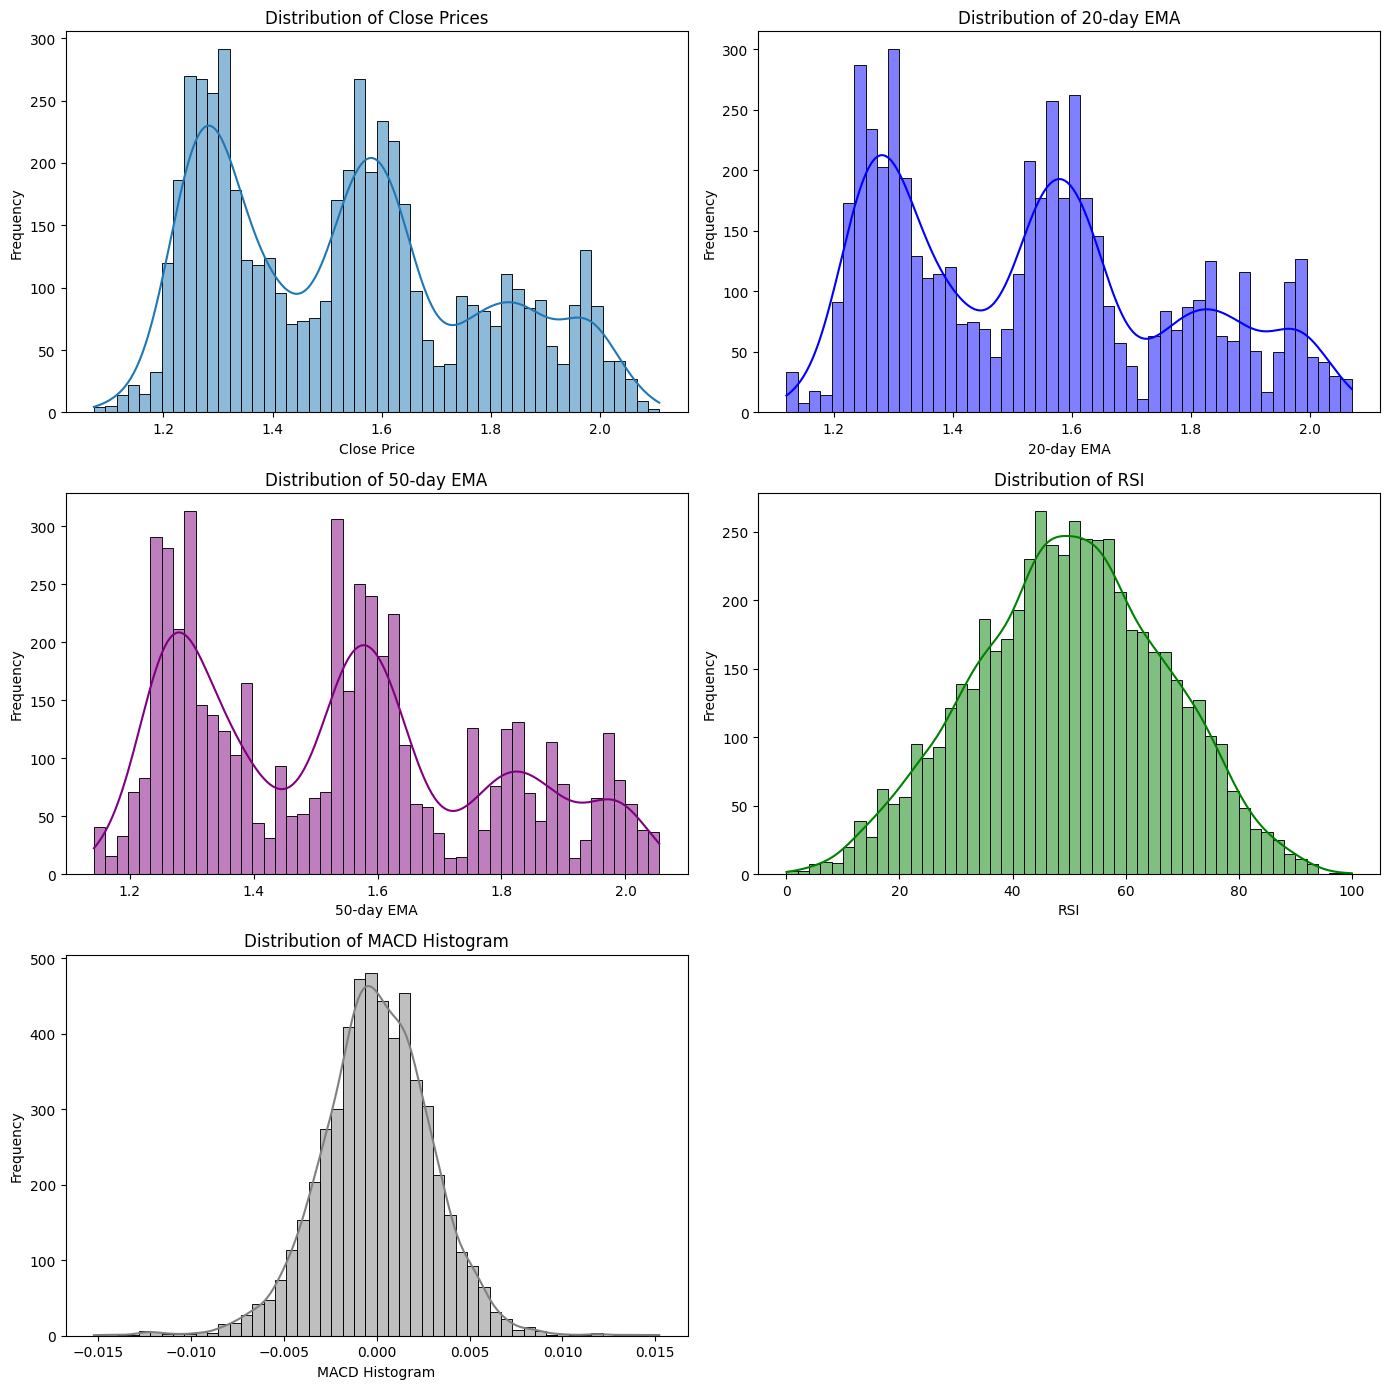

In [26]:
# Creating a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Distribution of Close Prices
sns.histplot(fx_cleaned_df2['Close'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Close Prices')
axes[0, 0].set_xlabel('Close Price')
axes[0, 0].set_ylabel('Frequency')

# Distribution of 50-day EMA
sns.histplot(fx_cleaned_df2['EMA_20'], bins=50, kde=True, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of 20-day EMA')
axes[0, 1].set_xlabel('20-day EMA')
axes[0, 1].set_ylabel('Frequency')

# Distribution of 200-day EMA
sns.histplot(fx_cleaned_df2['EMA_50'], bins=50, kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of 50-day EMA')
axes[1, 0].set_xlabel('50-day EMA')
axes[1, 0].set_ylabel('Frequency')

# Distribution of RSI
sns.histplot(fx_cleaned_df2['RSI'], bins=50, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of RSI')
axes[1, 1].set_xlabel('RSI')
axes[1, 1].set_ylabel('Frequency')

# Distribution of MACD Histogram
sns.histplot(fx_cleaned_df2['MACD_Histogram'], bins=50, kde=True, color='grey', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of MACD Histogram')
axes[2, 0].set_xlabel('MACD Histogram')
axes[2, 0].set_ylabel('Frequency')

# Removes the empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

In [27]:
# Summary Statistics
fx_cleaned_df2.describe()

Date         Open         High          Low  \
count                           5330  5330.000000  5330.000000  5330.000000   
mean   2014-03-05 00:17:01.238273792     1.534178     1.539934     1.528196   
min              2003-12-01 00:00:00     1.072846     1.083541     1.037904   
25%              2009-01-23 18:00:00     1.309934     1.314298     1.305458   
50%              2014-03-08 12:00:00     1.536098     1.542615     1.530397   
75%              2019-04-18 18:00:00     1.681011     1.684409     1.678465   
max              2024-05-29 00:00:00     2.108415     2.115820     2.098812   
std                              NaN     0.239760     0.240494     0.239159   

             Close       EMA_20       EMA_50          RSI    MACD_Line  \
count  5330.000000  5330.000000  5330.000000  5330.000000  5330.000000   
mean      1.534216     1.535024     1.536317    49.980568    -0.000603   
min       1.072754     1.120575     1.142428     0.000000    -0.059307   
25%       1.309989     1.309257     1.306019    38.382537    -0.005958   
50%       1.536134     1.536795     1.539070    50.196525     0.000041   
75%       1.680997     1.682355     1.681341    61.905743     0.005701   
max       2.108192     2.070346     2.054503   100.000000     0.038755   
std       0.239793     0.238818     0.237261    16.854668     0.010082   

       Signal_Line  MACD_Histogram  
count  5330.000000     5330.000000  
mean     -0.000606        0.000003  
min      -0.055333       -0.015220  
25%      -0.005691       -0.001784  
50%       0.000051       -0.000002  
75%       0.005409        0.001887  
max       0.033321        0.015213  
std       0.009511        0.002991

In [28]:
# Correlation of matrix for key columns
correlation_matrix = fx_cleaned_df2[['Open', 'High', 'Low', 'Close', 'EMA_20', 'EMA_50', 'RSI', 'MACD_Line', 'Signal_Line', 'MACD_Histogram']].corr()
print(correlation_matrix)

                    Open      High       Low     Close    EMA_20    EMA_50  \
Open            1.000000  0.999731  0.999652  0.999656  0.997168  0.991869   
High            0.999731  1.000000  0.999552  0.999708  0.997116  0.992076   
Low             0.999652  0.999552  1.000000  0.999688  0.996668  0.991066   
Close           0.999656  0.999708  0.999688  1.000000  0.996873  0.991498   
EMA_20          0.997168  0.997116  0.996668  0.996873  1.000000  0.997689   
EMA_50          0.991869  0.992076  0.991066  0.991498  0.997689  1.000000   
RSI             0.087082  0.087811  0.089988  0.090722  0.027064 -0.001782   
MACD_Line       0.123865  0.121395  0.127447  0.125572  0.064112  0.003237   
Signal_Line     0.132782  0.129823  0.135864  0.133540  0.086521  0.021655   
MACD_Histogram -0.004688 -0.003607 -0.002412 -0.001345 -0.059010 -0.057946   

                     RSI  MACD_Line  Signal_Line  MACD_Histogram  
Open            0.087082   0.123865     0.132782       -0.004688  
High   

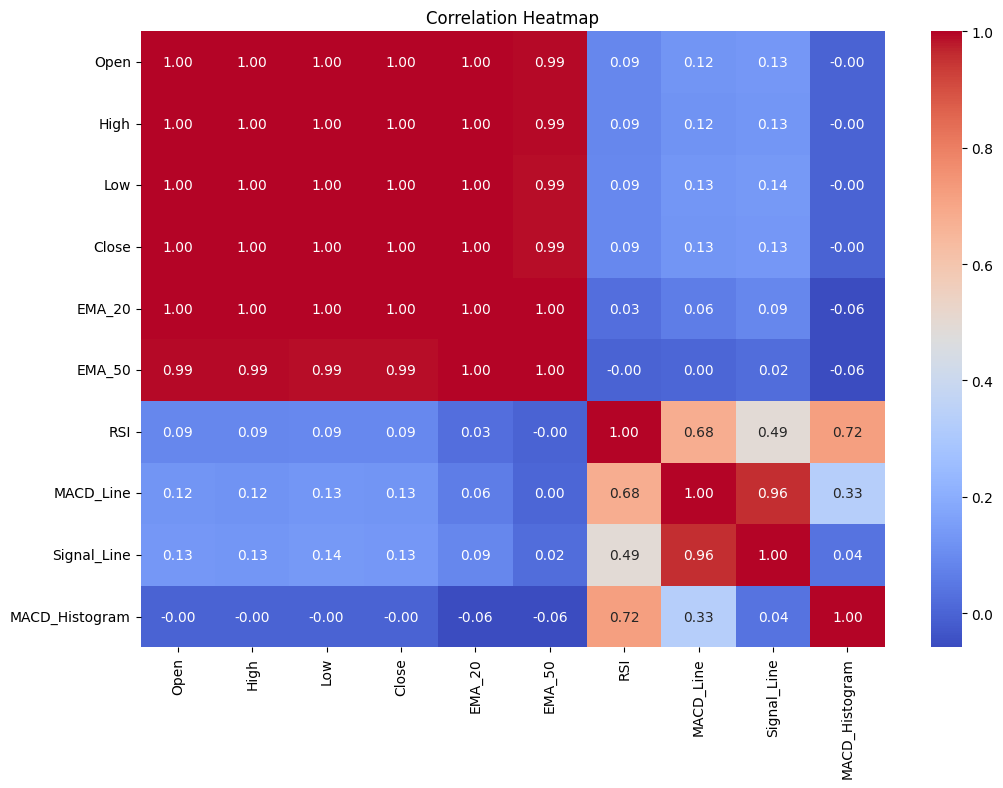

In [29]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 800x500 with 0 Axes>

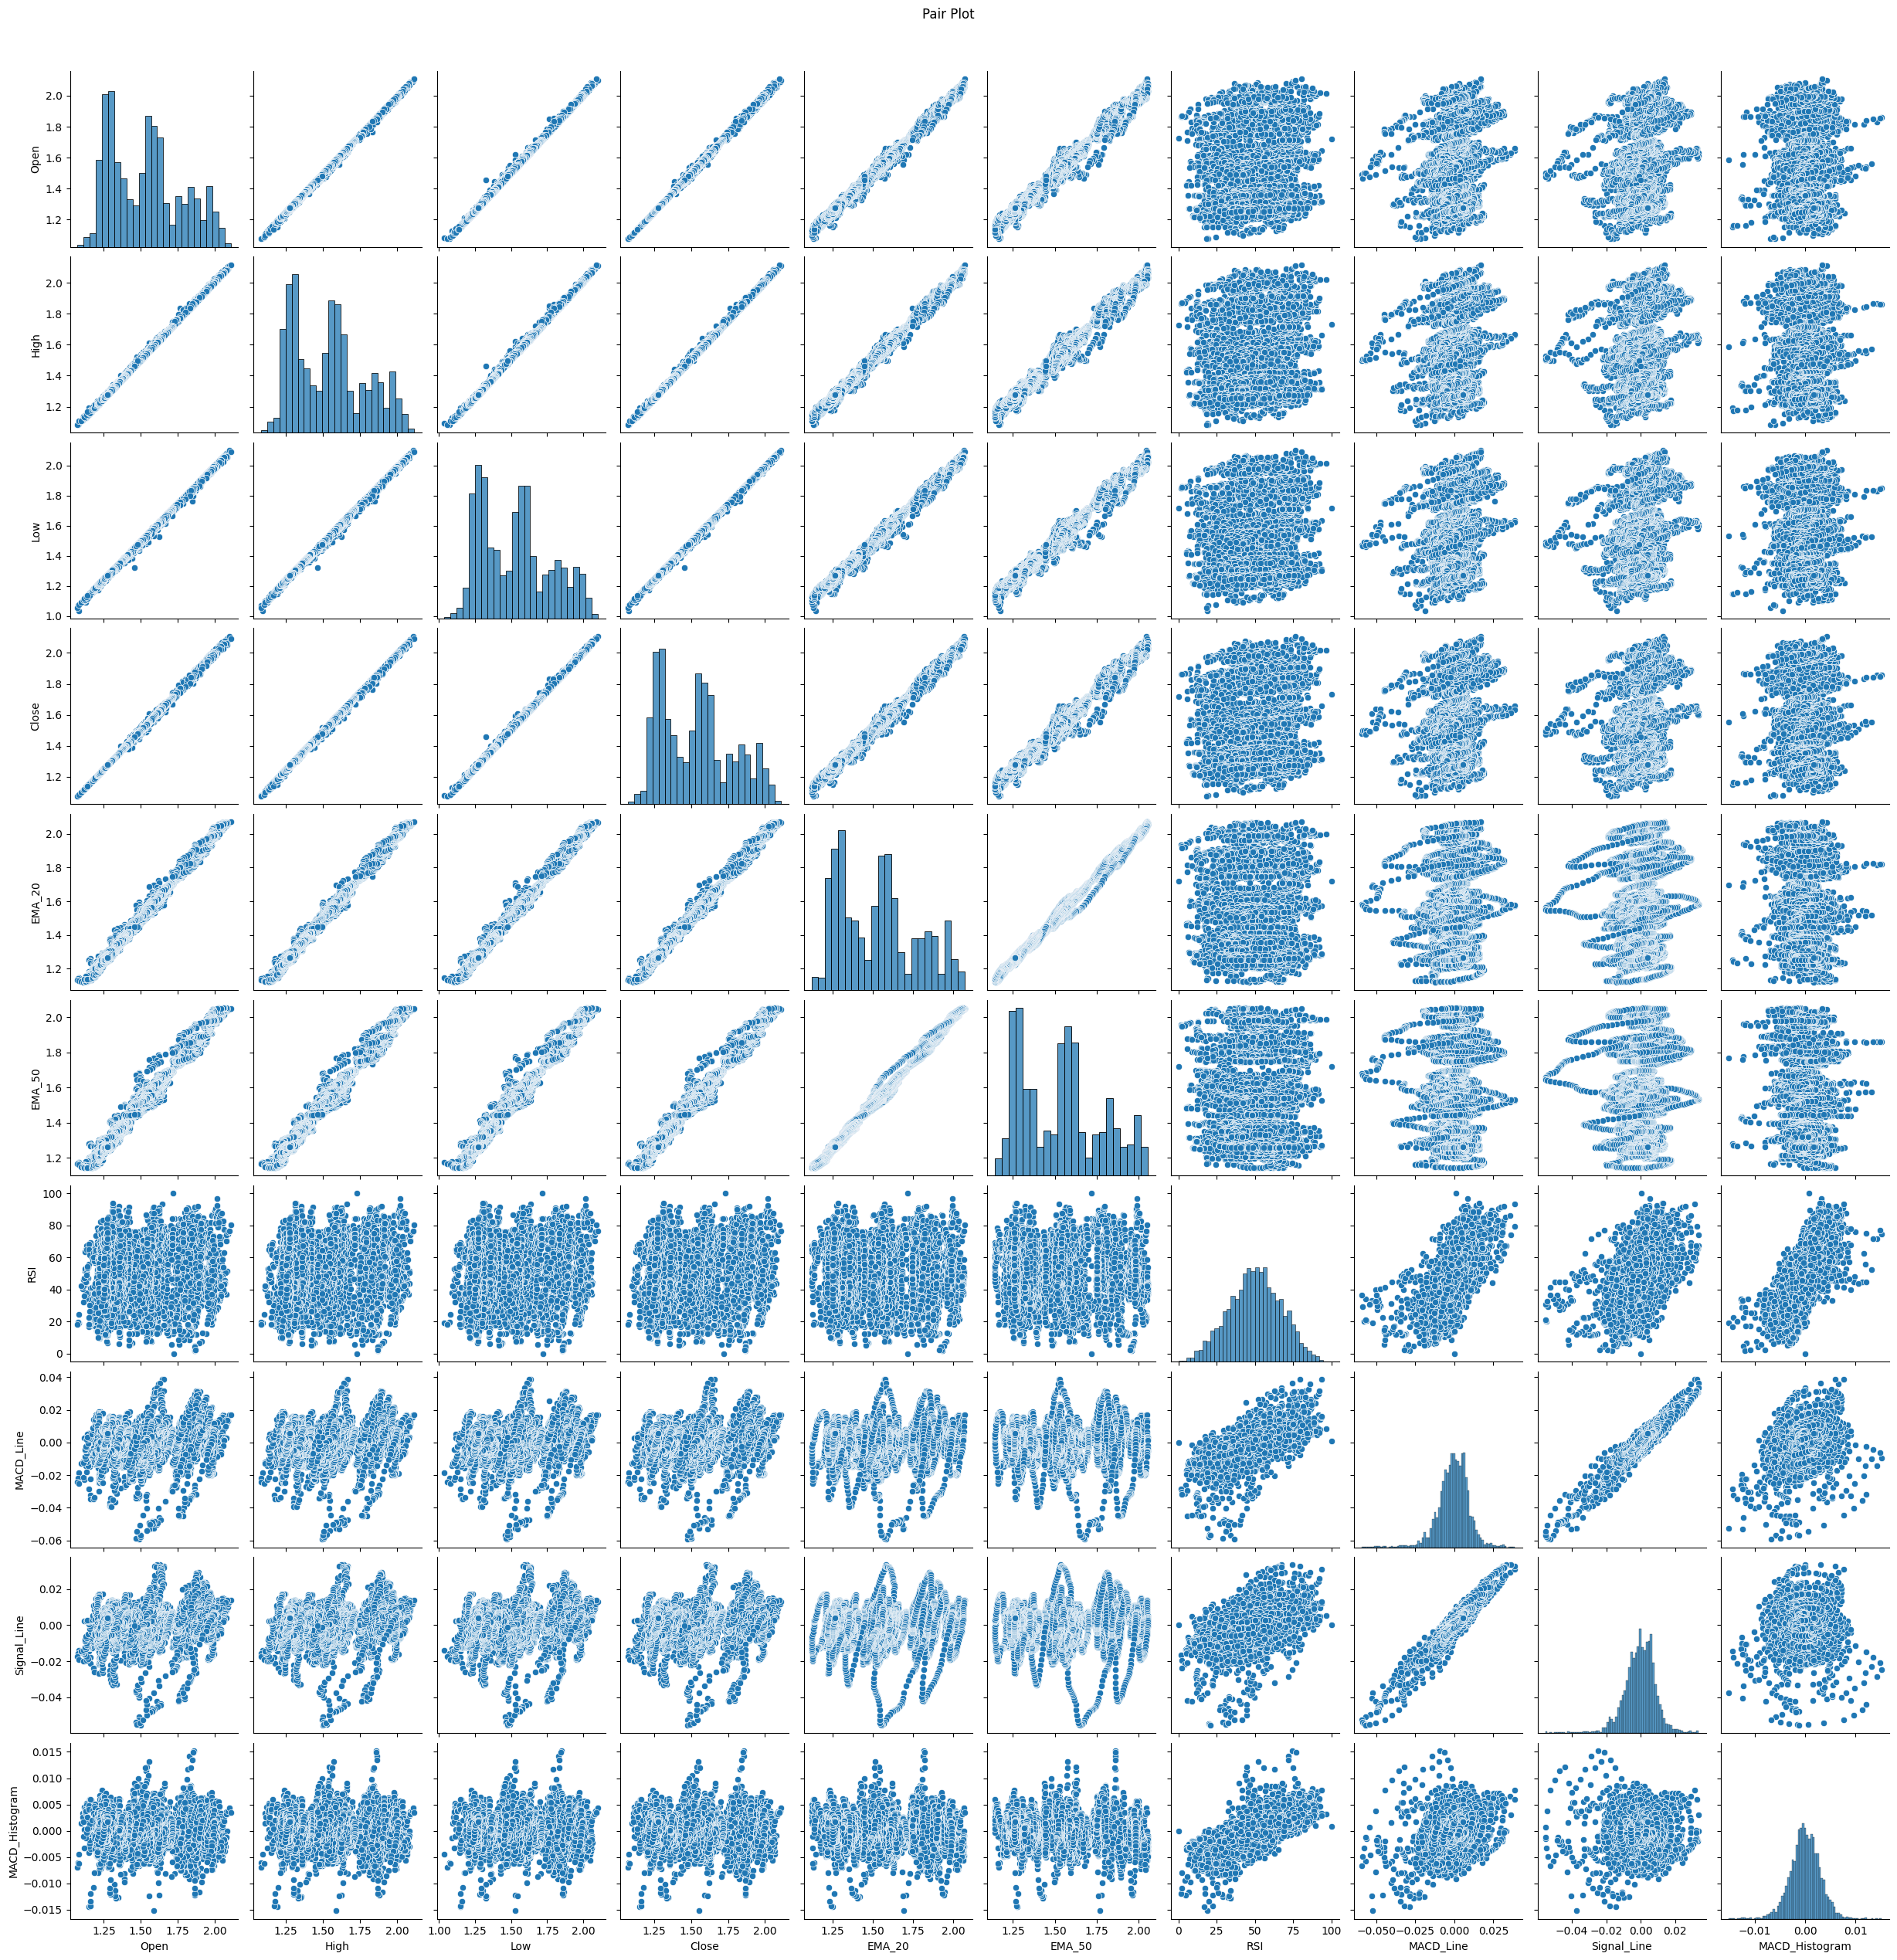

In [30]:
# Generating a pair plot for better understanding of the relation
fig = plt.figure(figsize=(8, 5))
g = sns.pairplot(fx_cleaned_df2)
g.fig.suptitle('Pair Plot', y=1.02)
plt.show()

### Objective 2. Developing and evaluating the performance of three machine learning models (GRU, XGBOOST, and Random Forest models) in predicting Forex price movements

In [31]:
# Displaying my DataFrame
fx_cleaned_df2

Date      Open      High       Low     Close    EMA_20    EMA_50  \
0    2003-12-01  1.723811  1.727205  1.718390  1.718597  1.718597  1.718597   
1    2003-12-02  1.719010  1.732112  1.717298  1.730313  1.719713  1.719056   
2    2003-12-03  1.730493  1.731812  1.725209  1.728101  1.720512  1.719411   
3    2003-12-04  1.727414  1.728997  1.718302  1.720697  1.720529  1.719462   
4    2003-12-05  1.720608  1.733102  1.719809  1.733102  1.721727  1.719996   
...         ...       ...       ...       ...       ...       ...       ...   
5343 2024-05-23  1.272087  1.274697  1.270616  1.272103  1.260881  1.259342   
5344 2024-05-24  1.269374  1.275136  1.268279  1.269406  1.261693  1.259737   
5345 2024-05-27  1.273447  1.277900  1.273447  1.273610  1.262828  1.260281   
5346 2024-05-28  1.277270  1.279984  1.276308  1.277237  1.264200  1.260946   
5347 2024-05-29  1.276000  1.277172  1.270713  1.275836  1.265308  1.261530   

             RSI  MACD_Line  Signal_Line  MACD_Histogram  
0       0.000000   0.000000     0.000000        0.000000  
1     100.000000   0.000935     0.000187        0.000748  
2      84.118323   0.001480     0.000445        0.001034  
3      54.922183   0.001299     0.000616        0.000683  
4      71.497169   0.002133     0.000920        0.001213  
...          ...        ...          ...             ...  
5343   75.397652   0.004447     0.002032        0.002414  
5344   70.040083   0.004531     0.002532        0.001999  
5345   71.762963   0.004881     0.003002        0.001879  
5346   85.386303   0.005388     0.003479        0.001909  
5347   84.094768   0.005613     0.003906        0.001707  

[5330 rows x 11 columns]

In [ ]:
# Setting random seeds for reproducibility
#np.random.seed(42)
#random.seed(42)
#tf.random.set_seed(42)

**1. Introduction and Data Preparation for the models**

In [32]:
# Ensuring the necessary columns for modeling are available
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'EMA_20', 'EMA_50', 'RSI', 'MACD_Line', 'Signal_Line', 'MACD_Histogram']
fx_cleaned_df2 = fx_cleaned_df2[required_columns]

# Selecting the features and target variable
X = fx_cleaned_df2.drop(columns=['Close', 'Date']).values
y = fx_cleaned_df2['Close'].values
dates = fx_cleaned_df2['Date'].values

# First split: Train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp, dates_train, dates_temp = train_test_split(X, y, dates, test_size=0.3, shuffle=False)

# Second split: Validation (15%) and Test (15%) from the temp set
X_val, X_test, y_val, y_test, dates_val, dates_test = train_test_split(X_temp, y_temp, dates_temp, test_size=0.5, shuffle=False)


**1. 2. Feature Scaling and Sequence Creation**

In [33]:
# Initializing the StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fitting the scaler on the training data and transforming both training, validation, and testing data for X features
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the target variable
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

def create_sequences(X, y, dates, time_steps=15):
    """
    Creates sequences of data for time series forecasting.

    This function takes in the feature matrix (X), target variable (y), and dates,
    and splits them into sequences of a specified length (time_steps). The sequences
    are returned as numpy arrays.

    Parameters:
    X (numpy.ndarray): The feature matrix of shape (n_samples, n_features).
    y (numpy.ndarray): The target variable of shape (n_samples,).
    dates (numpy.ndarray): The array of dates corresponding to the samples.
    time_steps (int): The length of the sequences to be created. Default is 15.

    Returns:
    tuple: Three numpy arrays containing the sequences for the feature matrix (Xs),
           target variable (ys), and dates (ds). The shapes of these arrays are
           (n_sequences, time_steps, n_features), (n_sequences,), and (n_sequences,), respectively.
    """
    Xs, ys, ds = [], [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
        ds.append(dates[i+time_steps])
    return np.array(Xs), np.array(ys), np.array(ds)

# Defining the time step
time_steps = 15

# Creating sequences for training, validation, and testing
X_train_seq, y_train_seq, dates_train_seq = create_sequences(X_train_scaled, y_train_scaled, dates_train, time_steps)
X_val_seq, y_val_seq, dates_val_seq = create_sequences(X_val_scaled, y_val_scaled, dates_val, time_steps)
X_test_seq, y_test_seq, dates_test_seq = create_sequences(X_test_scaled, y_test_scaled, dates_test, time_steps)

# Reshape X sequences to 2D for XGBoost and Random Forest
X_train_seq_flat = X_train_seq.reshape(X_train_seq.shape[0], -1)
X_val_seq_flat = X_val_seq.reshape(X_val_seq.shape[0], -1)
X_test_seq_flat = X_test_seq.reshape(X_test_seq.shape[0], -1)

# Flatten y sequences
y_train_seq_flat = y_train_seq.flatten()
y_val_seq_flat = y_val_seq.flatten()
y_test_seq_flat = y_test_seq.flatten()


In [34]:
# Save the scalers
dump(scaler_X, 'scaler_X.bin')
dump(scaler_y, 'scaler_y.bin')


['scaler_y.bin']

**3. Model Creation and Training for GRU**

In [ ]:
# Function to create the GRU model
def create_gru_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        GRU(units, return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])),
        Dropout(dropout_rate),
        GRU(units),
        Dropout(dropout_rate),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create and train the GRU model
model_gru = create_gru_model(units=50, dropout_rate=0.2, learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_gru = model_gru.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_data=(X_val_seq, y_val_seq), callbacks=[early_stopping], verbose=1)


Epoch 1/50
117/117 [==============================] - 7s 29ms/step - loss: 0.0671 - val_loss: 0.0102
Epoch 2/50
117/117 [==============================] - 3s 27ms/step - loss: 0.0242 - val_loss: 0.0033
Epoch 3/50
117/117 [==============================] - 2s 20ms/step - loss: 0.0183 - val_loss: 0.0032
Epoch 4/50
117/117 [==============================] - 2s 14ms/step - loss: 0.0164 - val_loss: 0.0064
Epoch 5/50
117/117 [==============================] - 2s 14ms/step - loss: 0.0145 - val_loss: 0.0038
Epoch 6/50
117/117 [==============================] - 2s 15ms/step - loss: 0.0144 - val_loss: 0.0091
Epoch 7/50
117/117 [==============================] - 2s 15ms/step - loss: 0.0134 - val_loss: 0.0076
Epoch 8/50
117/117 [==============================] - 3s 22ms/step - loss: 0.0125 - val_loss: 0.0055
Epoch 9/50
117/117 [==============================] - 3s 23ms/step - loss: 0.0129 - val_loss: 0.0046
Epoch 10/50
117/117 [==============================] - 2s 15ms/step - loss: 0.0127 - val_lo

**4. Evaluation of GRU model on the training and testing set**

In [ ]:
# Make predictions on the training set
gru_train_predictions = model_gru.predict(X_train_seq)
gru_train_predictions = scaler_y.inverse_transform(gru_train_predictions)
y_train_seq_inverse_gru = scaler_y.inverse_transform(y_train_seq)

# Calculate R² score for the training set
r2_gru_train = r2_score(y_train_seq_inverse_gru, gru_train_predictions)
print(f'R² score for GRU on training set: {r2_gru_train:.2f}')

# Make predictions on the test set
gru_test_predictions = model_gru.predict(X_test_seq)
gru_test_predictions = scaler_y.inverse_transform(gru_test_predictions)
y_test_seq_inverse_gru = scaler_y.inverse_transform(y_test_seq)

# Calculate R² score for the test set
r2_gru_test = r2_score(y_test_seq_inverse_gru, gru_test_predictions)
print(f'R² score for GRU on test set: {r2_gru_test:.2f}')


117/117 [==============================] - 1s 4ms/step
R² score for GRU on training set: 1.00
25/25 [==============================] - 0s 4ms/step
R² score for GRU on test set: 0.99


**5. Model Creation and Training for XGBoost**

In [ ]:
# Function to create the XGBoost model
def create_xgb_model(n_estimators=100, learning_rate=0.01, max_depth=3):
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, early_stopping_rounds=10)
    return model

# Create and train the XGBoost model
model_xgb = create_xgb_model(n_estimators=100, learning_rate=0.01, max_depth=3)
model_xgb.fit(X_train_seq_flat, y_train_seq_flat, eval_set=[(X_val_seq_flat, y_val_seq_flat)], verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**6. Evaluation of XGBoost model on the training and testing set**

In [ ]:
# Evaluate the XGBoost model on the training set
xgb_train_predictions = model_xgb.predict(X_train_seq_flat)
xgb_train_predictions = scaler_y.inverse_transform(xgb_train_predictions.reshape(-1, 1))
y_train_seq_inverse_xgb = scaler_y.inverse_transform(y_train_seq_flat.reshape(-1, 1))
r2_xgb_train = r2_score(y_train_seq_inverse_xgb, xgb_train_predictions)
print(f'R² score for XGBoost on training set: {r2_xgb_train:.2f}')

# Evaluate the XGBoost model on the test set
xgb_test_predictions = model_xgb.predict(X_test_seq_flat)
xgb_test_predictions = scaler_y.inverse_transform(xgb_test_predictions.reshape(-1, 1))
y_test_seq_inverse_xgb = scaler_y.inverse_transform(y_test_seq_flat.reshape(-1, 1))
r2_xgb_test = r2_score(y_test_seq_inverse_xgb, xgb_test_predictions)
print(f'R² score for XGBoost on test set: {r2_xgb_test:.2f}')

R² score for XGBoost on training set: 0.86
R² score for XGBoost on test set: -4.15


**7. Hyperparameter Tuning for the XGBoost because of overfitting**

In [ ]:
# Grid of hyperparameters to search
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.05, 0.055],
    'max_depth': [3, 4, 5],
    'reg_alpha': [0, 0.1, 0.5],  # Regularization parameters
    'reg_lambda': [1, 1.5, 2]     # Regularization parameters
}

best_score_xgb = float('inf')
best_params_xgb = None
best_model_xgb = None

# Manually iterate over the grid of hyperparameters
for n_estimators in param_grid_xgb['n_estimators']:
    for learning_rate in param_grid_xgb['learning_rate']:
        for max_depth in param_grid_xgb['max_depth']:
            for reg_alpha in param_grid_xgb['reg_alpha']:
                for reg_lambda in param_grid_xgb['reg_lambda']:
                    print(f'Training with n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, reg_alpha={reg_alpha}, reg_lambda={reg_lambda}')
                    model = xgb.XGBRegressor(objective='reg:squarederror',
                                             n_estimators=n_estimators,
                                             learning_rate=learning_rate,
                                             max_depth=max_depth,
                                             reg_alpha=reg_alpha,
                                             reg_lambda=reg_lambda,
                                             early_stopping_rounds=10)
                    model.fit(X_train_seq_flat, y_train_seq_flat, eval_set=[(X_val_seq_flat, y_val_seq_flat)], verbose=False)

                    val_predictions = model.predict(X_val_seq_flat)
                    val_mse = mean_squared_error(y_val_seq_flat, val_predictions)
                    if val_mse < best_score_xgb:
                        best_score_xgb = val_mse
                        best_params_xgb = (n_estimators, learning_rate, max_depth, reg_alpha, reg_lambda)
                        best_model_xgb = model

print(f'Best parameters for XGBoost: {best_params_xgb}')
print(f'Best validation loss for XGBoost: {best_score_xgb}')


Training with n_estimators=50, learning_rate=0.001, max_depth=3, reg_alpha=0, reg_lambda=1
Training with n_estimators=50, learning_rate=0.001, max_depth=3, reg_alpha=0, reg_lambda=1.5
Training with n_estimators=50, learning_rate=0.001, max_depth=3, reg_alpha=0, reg_lambda=2
Training with n_estimators=50, learning_rate=0.001, max_depth=3, reg_alpha=0.1, reg_lambda=1
Training with n_estimators=50, learning_rate=0.001, max_depth=3, reg_alpha=0.1, reg_lambda=1.5
Training with n_estimators=50, learning_rate=0.001, max_depth=3, reg_alpha=0.1, reg_lambda=2
Training with n_estimators=50, learning_rate=0.001, max_depth=3, reg_alpha=0.5, reg_lambda=1
Training with n_estimators=50, learning_rate=0.001, max_depth=3, reg_alpha=0.5, reg_lambda=1.5
Training with n_estimators=50, learning_rate=0.001, max_depth=3, reg_alpha=0.5, reg_lambda=2
Training with n_estimators=50, learning_rate=0.001, max_depth=4, reg_alpha=0, reg_lambda=1
Training with n_estimators=50, learning_rate=0.001, max_depth=4, reg_alp

**8. Evaluation of XGBoost model on the training and testing set after Hyperparameter Tuning with the best parameters**

In [ ]:
# Evaluate the best XGBoost model on the training set
best_xgb_train_predictions = best_model_xgb.predict(X_train_seq_flat)
best_xgb_train_predictions = scaler_y.inverse_transform(best_xgb_train_predictions.reshape(-1, 1))
best_y_train_seq_inverse_xgb = scaler_y.inverse_transform(y_train_seq_flat.reshape(-1, 1))
best_r2_xgb_train = r2_score(best_y_train_seq_inverse_xgb, best_xgb_train_predictions)
print(f'R² score for XGBoost on training set: {best_r2_xgb_train:.2f}')

# Evaluate the best XGBoost model on the test set
best_xgb_test_predictions = best_model_xgb.predict(X_test_seq_flat)
best_xgb_test_predictions = scaler_y.inverse_transform(best_xgb_test_predictions.reshape(-1, 1))
best_y_test_seq_inverse_xgb = scaler_y.inverse_transform(y_test_seq_flat.reshape(-1, 1))
best_r2_xgb_test = r2_score(best_y_test_seq_inverse_xgb, best_xgb_test_predictions)
print(f'R² score for XGBoost on test set: {best_r2_xgb_test:.2f}')

R² score for XGBoost on training set: 1.00
R² score for XGBoost on test set: 0.86


**9. Model Creation and Training for Random Forest**

In [ ]:
# Function to create the Random Forest model
def create_rf_model(n_estimators=50, max_depth=10, min_samples_split=2):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    return model

# Create and train the Random Forest model
model_rf = create_rf_model(n_estimators=50, max_depth=10, min_samples_split=2)
model_rf.fit(X_train_seq_flat, y_train_seq_flat)


RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

**10. Evaluation of Random Forest model on the training and testing set**

In [ ]:
# Evaluate the Random Forest model on the training set
rf_train_predictions = model_rf.predict(X_train_seq_flat)
rf_train_predictions = scaler_y.inverse_transform(rf_train_predictions.reshape(-1, 1))
y_train_seq_inverse_rf = scaler_y.inverse_transform(y_train_seq_flat.reshape(-1, 1))
r2_rf_train = r2_score(y_train_seq_inverse_rf, rf_train_predictions)
print(f'R² score for Random Forest on training set: {r2_rf_train:.2f}')

# Evaluate the Random Forest model on the test set
rf_test_predictions = model_rf.predict(X_test_seq_flat)
rf_test_predictions = scaler_y.inverse_transform(rf_test_predictions.reshape(-1, 1))
y_test_seq_inverse_rf = scaler_y.inverse_transform(y_test_seq_flat.reshape(-1, 1))
r2_rf_test = r2_score(y_test_seq_inverse_rf, rf_test_predictions)
print(f'R² score for Random Forest on test set: {r2_rf_test:.2f}')


R² score for Random Forest on training set: 1.00
R² score for Random Forest on test set: 0.89


**11. Hyperparameter Tuning for the Random Forest model to see if we can improve the R² score on the test set**

In [ ]:
# Grid of hyperparameters to search
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

best_score_rf = float('inf')
best_params_rf = None
best_model_rf = None

# Manually iterate over the grid of hyperparameters
for n_estimators in param_grid_rf['n_estimators']:
    for max_depth in param_grid_rf['max_depth']:
        for min_samples_split in param_grid_rf['min_samples_split']:
            print(f'Training with n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}')
            model = create_rf_model(n_estimators, max_depth, min_samples_split)
            model.fit(X_train_seq_flat, y_train_seq_flat)

            val_predictions = model.predict(X_val_seq_flat)
            val_mse = mean_squared_error(y_val_seq_flat, val_predictions)
            if val_mse < best_score_rf:
                best_score_rf = val_mse
                best_params_rf = (n_estimators, max_depth, min_samples_split)
                best_model_rf = model

print(f'Best parameters for Random Forest: {best_params_rf}')
print(f'Best validation loss for Random Forest: {best_score_rf}')


Training with n_estimators=100, max_depth=10, min_samples_split=2
Training with n_estimators=100, max_depth=10, min_samples_split=5
Training with n_estimators=100, max_depth=10, min_samples_split=10
Training with n_estimators=100, max_depth=10, min_samples_split=15
Training with n_estimators=100, max_depth=15, min_samples_split=2
Training with n_estimators=100, max_depth=15, min_samples_split=5
Training with n_estimators=100, max_depth=15, min_samples_split=10
Training with n_estimators=100, max_depth=15, min_samples_split=15
Training with n_estimators=100, max_depth=20, min_samples_split=2
Training with n_estimators=100, max_depth=20, min_samples_split=5
Training with n_estimators=100, max_depth=20, min_samples_split=10
Training with n_estimators=100, max_depth=20, min_samples_split=15
Training with n_estimators=150, max_depth=10, min_samples_split=2
Training with n_estimators=150, max_depth=10, min_samples_split=5
Training with n_estimators=150, max_depth=10, min_samples_split=10
Tra

**12. Evaluation of best Random Forest model on the training and testing set**

In [ ]:
# Evaluate the best Random Forest model on the training set
best_rf_train_predictions = best_model_rf.predict(X_train_seq_flat)
best_rf_train_predictions = scaler_y.inverse_transform(best_rf_train_predictions.reshape(-1, 1))
best_y_train_seq_inverse_rf = scaler_y.inverse_transform(y_train_seq_flat.reshape(-1, 1))
best_r2_rf_train = r2_score(best_y_train_seq_inverse_rf, best_rf_train_predictions)
print(f'R² score for Random Forest on training set: {best_r2_rf_train:.2f}')

# Evaluate the best Random Forest model on the test set
best_rf_test_predictions = best_model_rf.predict(X_test_seq_flat)
best_rf_test_predictions = scaler_y.inverse_transform(best_rf_test_predictions.reshape(-1, 1))
best_y_test_seq_inverse_rf = scaler_y.inverse_transform(y_test_seq_flat.reshape(-1, 1))
best_r2_rf_test = r2_score(best_y_test_seq_inverse_rf, best_rf_test_predictions)
print(f'R² score for Random Forest on test set: {best_r2_rf_test:.2f}')


R² score for Random Forest on training set: 1.00
R² score for Random Forest on test set: 0.89


**Saving the models**

In [ ]:
# Trained models
best_model_gru = model_gru
best_model_xgb = best_model_xgb
best_model_rf = best_model_rf

# Defined the file paths to save the models
gru_model_path = 'best_model_gru.keras'
gru_model_path1 = 'best_model_gru.h5'
xgb_model_path = 'best_model_xgb.json'
rf_model_path = 'best_model_rf.pkl'

# Saved the GRU model using the Keras format
save_model(best_model_gru, gru_model_path)
print(f"GRU model saved as '{gru_model_path}'")

# Save the GRU model using the HDF5 format
#save_model(best_model_gru, gru_model_path1)
#print(f"GRU model saved as '{gru_model_path1}'")

# Saved the XGBoost model
best_model_xgb.save_model(xgb_model_path)
print(f"XGBoost model saved as '{xgb_model_path}'")

# Saved the Random Forest model
dump(best_model_rf, rf_model_path)
print(f"Random Forest model saved as '{rf_model_path}'")

GRU model saved as 'best_model_gru.keras'
XGBoost model saved as 'best_model_xgb.json'
Random Forest model saved as 'best_model_rf.pkl'


# **13. Evaluations of the performance of the three machine learning models (GRU, XGBOOST, and Random Forest)**

**Loading the Models**

In [63]:
# Load the saved models
def load_models():
    """
    Load the saved models from disk.

    Returns:
    tuple: A tuple containing the loaded GRU, XGBoost, and Random Forest models.
    """
    best_model_gru = load_model('best_model_gru.keras')
    best_model_xgb = xgb.Booster()
    best_model_xgb.load_model('best_model_xgb.json')
    best_model_rf = load('best_model_rf.pkl')
    return best_model_gru, best_model_xgb, best_model_rf


**1. Ensuring the Scaler is Fitted**

In [64]:
# Ensure scaler_y is fitted before using it
try:
    scaler_y.inverse_transform(np.array([[0]]))
except NotFittedError:
    print("scaler_y is not fitted. Ensure scaler_y is fitted on the training data.")


**2. Evaluate Model Metrics Function**

In [65]:
# Function to evaluate and return performance metrics as a DataFrame
def evaluate_model_metrics(model_name, y_true, y_pred):
    """
    Evaluate the performance of a regression model using various metrics.

    Parameters:
    model_name (str): The name of the model being evaluated.
    y_true (array-like): The true target values.
    y_pred (array-like): The predicted target values from the model.

    Returns:
    pd.DataFrame: A DataFrame containing the model's name and various performance metrics.
    """
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    metrics = pd.DataFrame({
        'Model': [model_name],
        'MSE': [mse],
        'MAE': [mae],
        'RMSE': [rmse],
        'R2': [round(r2, 2)],
        'MAPE': [mape]
    })
    return metrics


3. Load and Evaluate each Model

In [66]:
# Load models
best_model_gru, best_model_xgb, best_model_rf = load_models()

# Evaluate GRU model
gru_test_predictions = best_model_gru.predict(X_test_seq)
gru_test_predictions = scaler_y.inverse_transform(gru_test_predictions)
y_test_seq_inverse_gru = scaler_y.inverse_transform(y_test_seq)
gru_metrics = evaluate_model_metrics('GRU', y_test_seq_inverse_gru, gru_test_predictions)

# Evaluate XGBoost model
best_xgb_test_predictions = best_model_xgb.predict(xgb.DMatrix(X_test_seq_flat))
best_xgb_test_predictions = scaler_y.inverse_transform(best_xgb_test_predictions.reshape(-1, 1))
best_y_test_seq_inverse_xgb = scaler_y.inverse_transform(y_test_seq_flat.reshape(-1, 1))
xgboost_metrics = evaluate_model_metrics('XGBoost', best_y_test_seq_inverse_xgb, best_xgb_test_predictions)

# Evaluate Random Forest model
best_rf_test_predictions = best_model_rf.predict(X_test_seq_flat)
best_rf_test_predictions = scaler_y.inverse_transform(best_rf_test_predictions.reshape(-1, 1))
best_y_test_seq_inverse_rf = scaler_y.inverse_transform(y_test_seq_flat.reshape(-1, 1))
random_forest_metrics = evaluate_model_metrics('Random Forest', best_y_test_seq_inverse_rf, best_rf_test_predictions)

# Combine all metrics into a single DataFrame
all_metrics = pd.concat([gru_metrics, xgboost_metrics, random_forest_metrics], ignore_index=True)

# Display the combined metrics
print(all_metrics)


25/25 [==============================] - 1s 5ms/step
           Model       MSE       MAE      RMSE    R2      MAPE
0            GRU  0.000052  0.005152  0.007224  0.99  0.004158
1        XGBoost  0.000672  0.012270  0.025920  0.86  0.010357
2  Random Forest  0.000548  0.011318  0.023404  0.89  0.009468


**4. Plotting Functions**

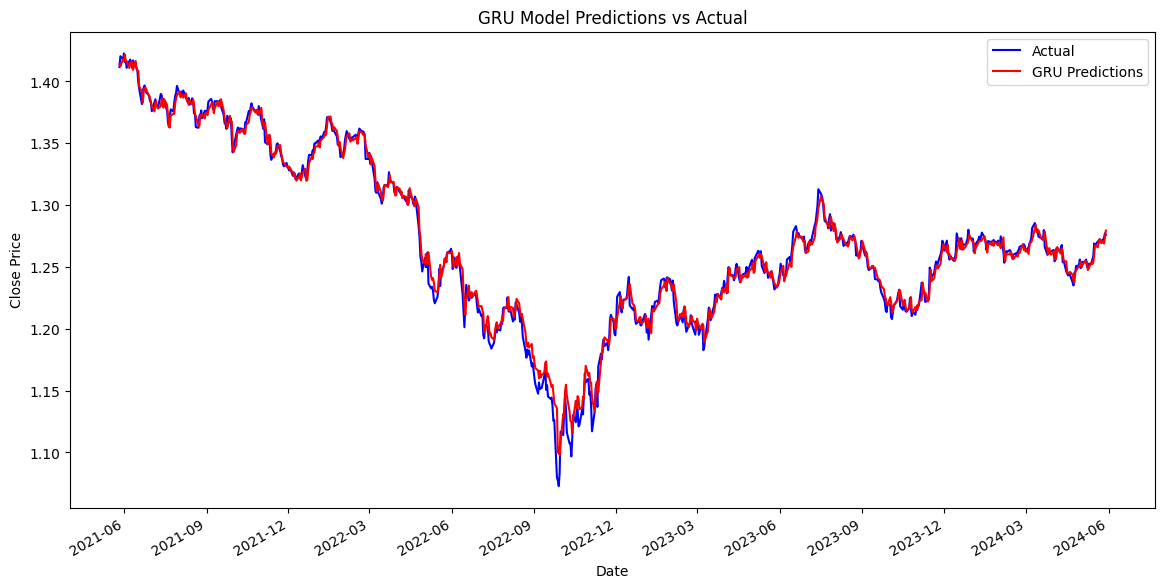

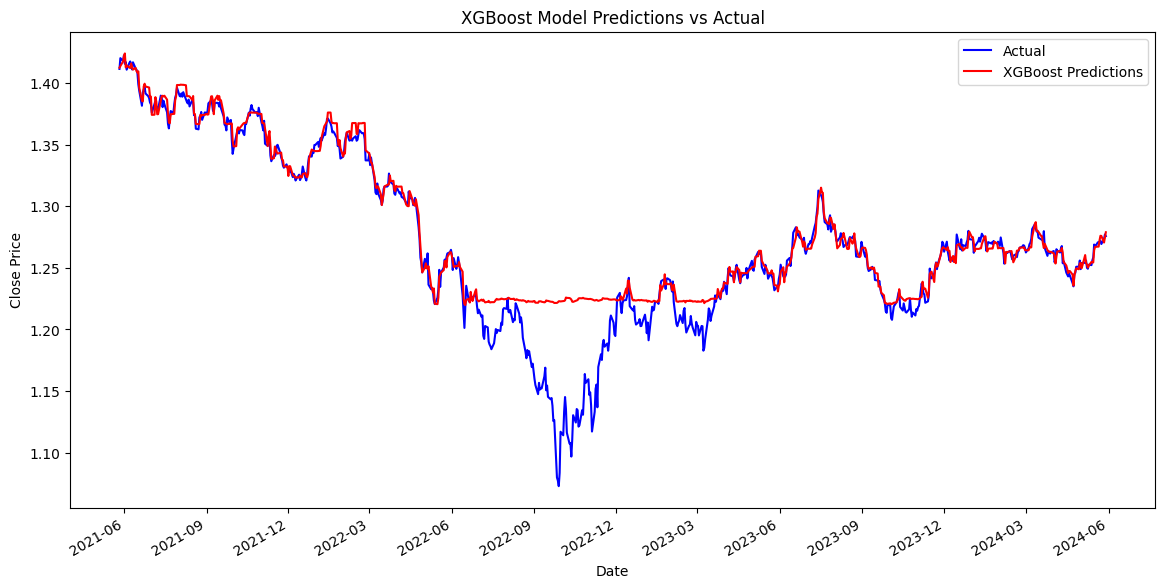

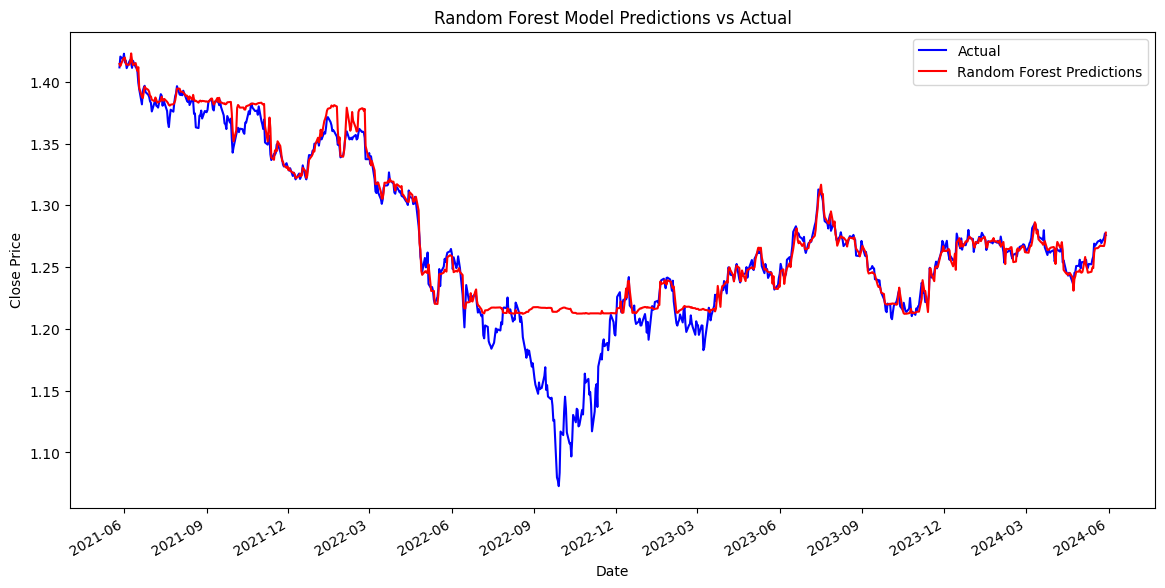

In [67]:
# Function to plot actual vs predicted values
def plot_predictions(dates, y_true, y_pred, model_name):
    plt.figure(figsize=(14, 7))
    plt.plot(dates, y_true, label='Actual', color='blue')
    plt.plot(dates, y_pred, label=f'{model_name} Predictions', color='red')
    plt.title(f'{model_name} Model Predictions vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gcf().autofmt_xdate()
    plt.show()

# Plot predictions for each model
plot_predictions(dates_test_seq, y_test_seq_inverse_gru, gru_test_predictions, 'GRU')
plot_predictions(dates_test_seq, best_y_test_seq_inverse_xgb, best_xgb_test_predictions, 'XGBoost')
plot_predictions(dates_test_seq, best_y_test_seq_inverse_rf, best_rf_test_predictions, 'Random Forest')


**For Residuals**

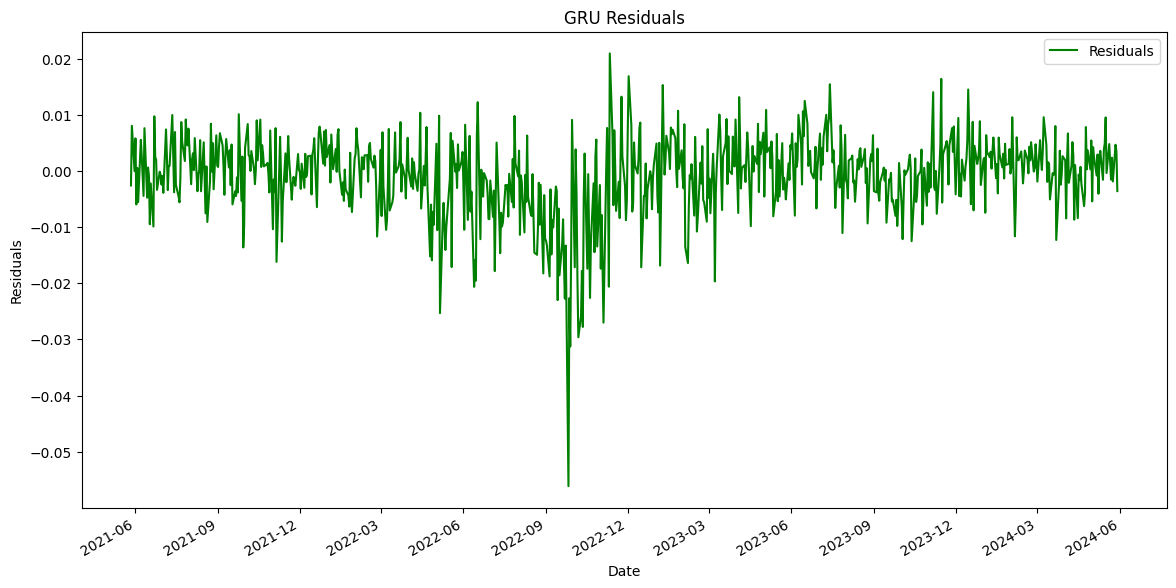

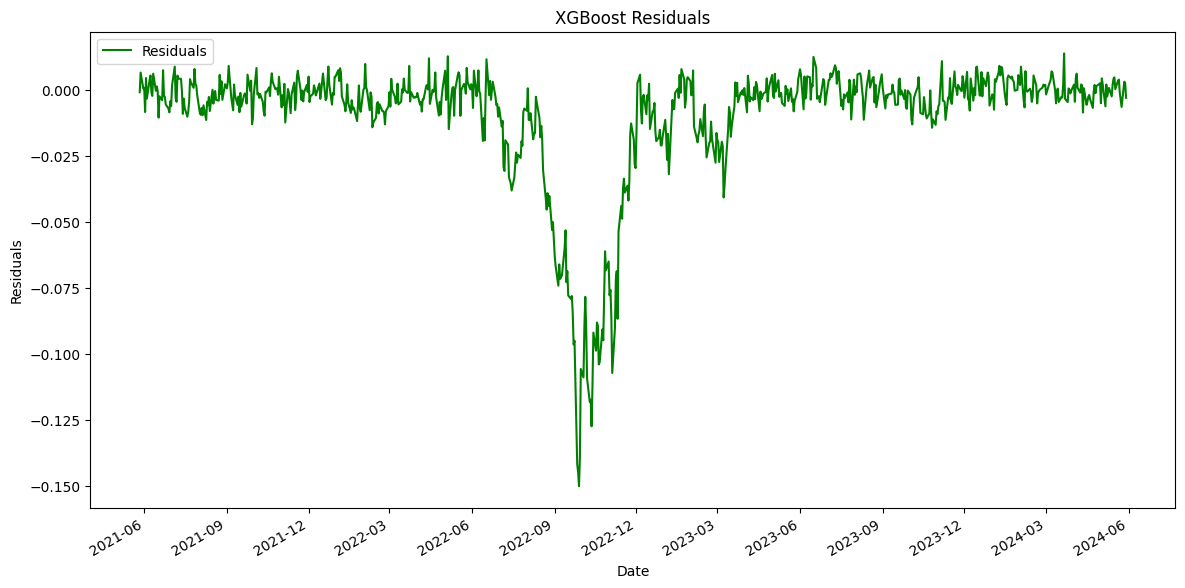

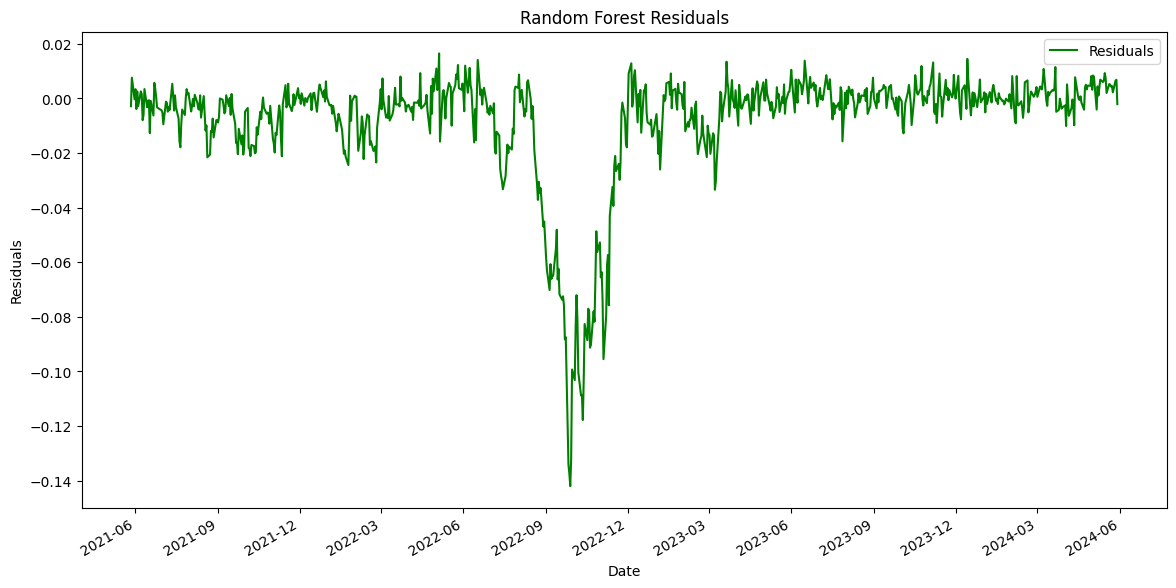

In [68]:
# Function to plot residuals
def plot_residuals(dates, y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(14, 7))
    plt.plot(dates, residuals, label='Residuals', color='green')
    plt.title(f'{model_name} Residuals')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gcf().autofmt_xdate()
    plt.show()

# Plot residuals for each model
plot_residuals(dates_test_seq, y_test_seq_inverse_gru, gru_test_predictions, 'GRU')
plot_residuals(dates_test_seq, best_y_test_seq_inverse_xgb, best_xgb_test_predictions, 'XGBoost')
plot_residuals(dates_test_seq, best_y_test_seq_inverse_rf, best_rf_test_predictions, 'Random Forest')


### Objective 3 & 4. Implementing a simple trading strategy for each model and simulate trades using a back testing approach and also analyzing the trading results for each model to determine profitability.

**1. Generate Trading Signals**

In [69]:
# Function to generate simple trading signals based on model predictions
def generate_simple_signals(predictions, actual, dates):
    """
    Generate simple trading signals based on model predictions.

    Parameters:
    predictions (array-like): Model predictions for the target variable.
    actual (array-like): Actual values of the target variable.
    dates (array-like): Dates corresponding to the target variable values.

    Returns:
    list of tuples: A list of trading signals, each represented as a tuple with the date and 'Buy' or 'Sell' signal.
    """
    signals = [
        (dates[i], 'Buy' if predictions[i + 1] > actual[i] else 'Sell')
        for i in range(len(predictions) - 1)
    ]
    return signals


**2. Simulate and Evaluate Trading Strategy**

In [70]:
# Simulate and evaluate the simple trading strategy with stop loss and take profit
def simulate_and_evaluate_simple_trading(signals, actual, dates, stop_loss_pct=0.001, take_profit_pct=0.002):
    """
    Simulate and evaluate a simple trading strategy with stop loss and take profit.

    Parameters:
    signals (list of tuples): Trading signals generated by the model.
    actual (array-like): Actual values of the target variable.
    dates (array-like): Dates corresponding to the target variable values.
    stop_loss_pct (float): Stop loss percentage.
    take_profit_pct (float): Take profit percentage.

    Returns:
    tuple: Final balance, profit, Sharpe ratio, maximum drawdown, balance history, and executed trade dates.
    """
    initial_balance = 10000
    balance = initial_balance
    position_size = 0
    balance_history = []
    full_dates = []  # Track all dates

    for i, (date, signal) in enumerate(signals):
        trade_amount = actual[i]  # Price per unit

        if signal == 'Buy' and balance > trade_amount:
            position_size = int(balance // trade_amount)
            cost = position_size * trade_amount
            balance -= cost
            entry_price = trade_amount
            stop_loss_price = entry_price * (1 - stop_loss_pct)
            take_profit_price = entry_price * (1 + take_profit_pct)

            for j in range(i + 1, len(actual)):
                if actual[j] <= stop_loss_price or actual[j] >= take_profit_price:
                    balance += position_size * actual[j]
                    position_size = 0
                    break
        elif signal == 'Sell' and position_size > 0:
            balance += position_size * trade_amount
            position_size = 0

        balance_history.append(max(balance + position_size * actual[i], 0))
        full_dates.append(date)  # Append current date to full dates

    final_balance = balance_history[-1] if balance_history else initial_balance
    profit = final_balance - initial_balance
    daily_returns = calculate_daily_returns(balance_history)
    sharpe_ratio = calculate_sharpe_ratio(daily_returns)
    max_drawdown = calculate_max_drawdown(balance_history)

    return final_balance, profit, sharpe_ratio, max_drawdown, balance_history, full_dates  # Return full dates


**3. Calculate Daily Returns**

In [71]:
# Calculate daily returns
def calculate_daily_returns(balance_history):
    """
    Calculate daily returns based on balance history.

    Parameters:
    balance_history (array-like): History of account balances.

    Returns:
    array: Daily returns.
    """
    balance_history = np.array(balance_history)
    returns = (balance_history[1:] - balance_history[:-1]) / balance_history[:-1]
    return returns


**4. Calculate Sharpe Ratio**

In [72]:
# Function to calculate Sharpe ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    """
    Calculate the Sharpe ratio of the returns.

    Parameters:
    returns (array-like): Daily returns.
    risk_free_rate (float): Risk-free rate for calculating excess returns.

    Returns:
    float: Sharpe ratio.
    """
    if len(returns) == 0:
        return np.nan
    excess_returns = returns - (risk_free_rate / 252)
    if np.std(excess_returns) == 0:
        return np.nan
    return np.mean(excess_returns) / np.std(excess_returns)


**5. Calculate Maximum Drawdown**

In [73]:
# Function to calculate maximum drawdown
def calculate_max_drawdown(balance_history):
    """
    Calculate the maximum drawdown from the balance history.

    Parameters:
    balance_history (array-like): History of account balances.

    Returns:
    float: Maximum drawdown.
    """
    balance_history = np.array(balance_history)
    peak = np.maximum.accumulate(balance_history)
    drawdown = (peak - balance_history) / peak
    return np.max(drawdown)


**6. Plot Trading Performance**

In [74]:
# Function to plot the final balance and performance metrics
def plot_trading_performance(dates, balance_history, model_name):
    """
    Plot the trading performance over time.

    Parameters:
    dates (array-like): Dates corresponding to the balance history.
    balance_history (array-like): History of account balances.
    model_name (str): Name of the model being evaluated.

    Returns:
    None
    """
    plt.figure(figsize=(14, 7))
    plt.plot(dates, balance_history, label='Balance History', color='blue')
    plt.title(f'{model_name} Trading Performance')
    plt.xlabel('Date')
    plt.ylabel('Account Balance')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gcf().autofmt_xdate()
    plt.show()


**7. Evaluate Model**

In [75]:
# Function to predict and evaluate a model
def evaluate_model(model, X_test, y_test, scaler_y, dates, model_name):
    """
    Predict and evaluate a model's performance.

    Parameters:
    model (object): The trained model to be evaluated.
    X_test (array-like): Test set features.
    y_test (array-like): Test set target values.
    scaler_y (object): Scaler used to inverse transform the target values.
    dates (array-like): Dates corresponding to the test set.
    model_name (str): Name of the model being evaluated.

    Returns:
    tuple: Final balance, profit, Sharpe ratio, and maximum drawdown.
    """
    if len(X_test.shape) == 1:
        X_test = X_test.reshape(-1, 1)

    # Convert X_test to appropriate format for each model type
    if model_name == 'XGBoost':
        X_test_dmatrix = xgb.DMatrix(X_test)
        predictions = model.predict(X_test_dmatrix)
        predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()  # Inverse transform XGBoost predictions
    else:
        predictions = model.predict(X_test)
        predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

    y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Debug statements to check predictions and actual values
    print(f'{model_name} Predictions: {predictions[:10]}')
    print(f'{model_name} Actual: {y_test_inverse[:10]}')

    simple_signals = generate_simple_signals(predictions, y_test_inverse, dates)

    # Debug statement to check signals
    print(f'{model_name} Signals: {simple_signals[:10]}')

    final_balance, profit, sharpe_ratio, max_drawdown, balance_history, full_dates = simulate_and_evaluate_simple_trading(simple_signals, y_test_inverse, dates)  # Use full dates

    print(f'{model_name} - Final Balance: {final_balance:.2f}, Profit: {profit:.2f}, Sharpe Ratio: {sharpe_ratio:.2f}, Max Drawdown: {max_drawdown:.2f}')

    if balance_history:
        plot_trading_performance(full_dates, balance_history, model_name)  # Plot with full dates
    else:
        print(f"No trades were executed for {model_name}, balance history is empty.")
    return final_balance, profit, sharpe_ratio, max_drawdown


**8. Evaluate Ensemble Model**

In [76]:
def evaluate_ensemble(models, X_test_seq, X_test_flat, y_test, scaler_y, dates):
    """
    Evaluate an ensemble model's performance.

    Parameters:
    models (list): List of tuples containing the trained models and their names.
    X_test_seq (array-like): Sequential test set features.
    X_test_flat (array-like): Flattened test set features.
    y_test (array-like): Test set target values.
    scaler_y (object): Scaler used to inverse transform the target values.
    dates (array-like): Dates corresponding to the test set.

    Returns:
    tuple: Final balance, profit, sharpe ratio, maximum drawdown, and ensemble metrics DataFrame.
    """
    predictions_list = []

    for model, model_name in models:
        if model_name == 'GRU':
            predictions = model.predict(X_test_seq)
            predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
        elif model_name == 'XGBoost':
            X_test_dmatrix = xgb.DMatrix(X_test_flat)
            predictions = model.predict(X_test_dmatrix)
            predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
        else:  # Random Forest
            predictions = model.predict(X_test_flat)
            predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

        predictions_list.append(predictions)

    # Averaging the predictions to create the ensemble prediction
    ensemble_predictions = np.mean(predictions_list, axis=0)
    y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Debug statements to check ensemble predictions and actual values
    print(f'Ensemble Predictions: {ensemble_predictions[:10]}')
    print(f'Ensemble Actual: {y_test_inverse[:10]}')

    simple_signals = generate_simple_signals(ensemble_predictions, y_test_inverse, dates)

    # Debug statement to check signals
    print(f'Ensemble Signals: {simple_signals[:10]}')

    final_balance, profit, sharpe_ratio, max_drawdown, balance_history, full_dates = simulate_and_evaluate_simple_trading(simple_signals, y_test_inverse, dates)  # Use full dates

    print(f'Ensemble - Final Balance: {final_balance:.2f}, Profit: {profit:.2f}, Sharpe Ratio: {sharpe_ratio:.2f}, Max Drawdown: {max_drawdown:.2f}')

    if balance_history:
        plot_trading_performance(full_dates, balance_history, 'Ensemble')  # Plot with full dates
    else:
        print(f"No trades were executed for Ensemble, balance history is empty.")

    # Evaluate the model metrics
    ensemble_metrics = evaluate_model_metrics('Ensemble', y_test_inverse, ensemble_predictions)
    print(ensemble_metrics)

    # Plot predictions
    plot_predictions(dates, y_test_inverse, ensemble_predictions, 'Ensemble')

    # Plot residuals
    plot_residuals(dates, y_test_inverse, ensemble_predictions, 'Ensemble')

    return final_balance, profit, sharpe_ratio, max_drawdown, ensemble_metrics

**9. Call Load Models Functions and Evaluate**

25/25 [==============================] - 2s 5ms/step
GRU Predictions: [1.4141858 1.4123206 1.4180667 1.4168621 1.4216613 1.4166331 1.4165268
 1.4108865 1.415085  1.4161118]
GRU Actual: [1.411612 1.420374 1.418037 1.422678 1.415709 1.417193 1.410994 1.416431
 1.417656 1.414988]
GRU Signals: [(numpy.datetime64('2021-05-27T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-05-28T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-05-31T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-01T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-02T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-06-03T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-04T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-07T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-08T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-09T00:00:00.000000000'), 'Buy')]
GRU - Final Balance: 14715.80, Profit: 4715.80, Sharpe Ratio: 0.09, Max Drawdown: 0.17


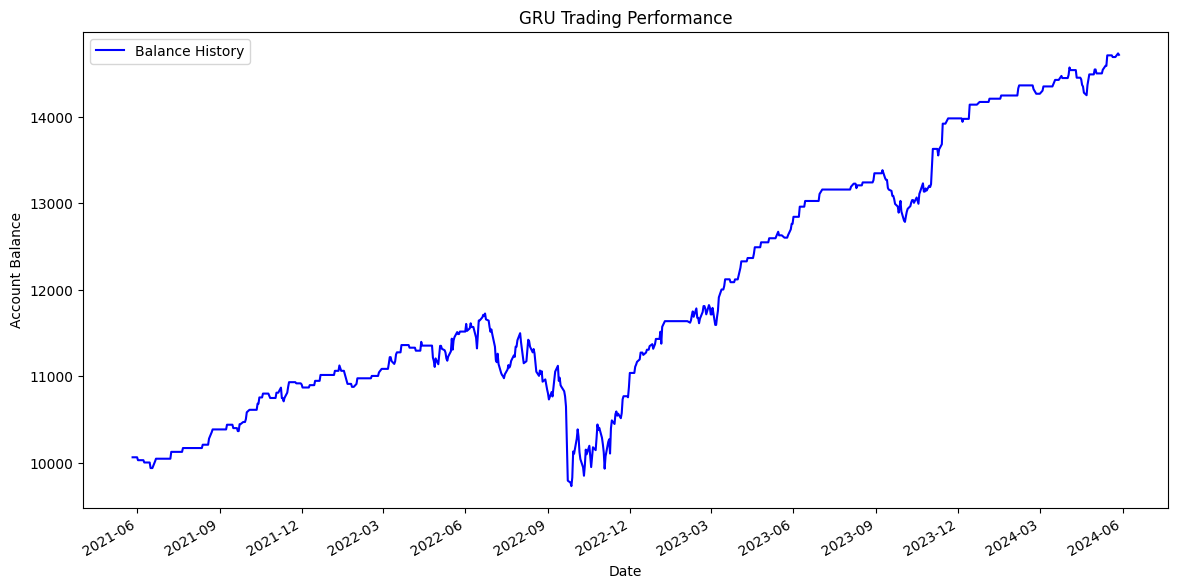

XGBoost Predictions: [1.4126058 1.4139419 1.4176482 1.4220346 1.4242101 1.4128218 1.414369
 1.4128202 1.4123251 1.4160314]
XGBoost Actual: [1.411612 1.420374 1.418037 1.422678 1.415709 1.417193 1.410994 1.416431
 1.417656 1.414988]
XGBoost Signals: [(numpy.datetime64('2021-05-27T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-05-28T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-05-31T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-06-01T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-06-02T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-03T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-04T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-06-07T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-08T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-09T00:00:00.000000000'), 'Sell')]
XGBoost - Final Balance: 16618.54, Profit: 6618.54, Sharpe Ratio: 0.11, Max Drawdown: 0.16


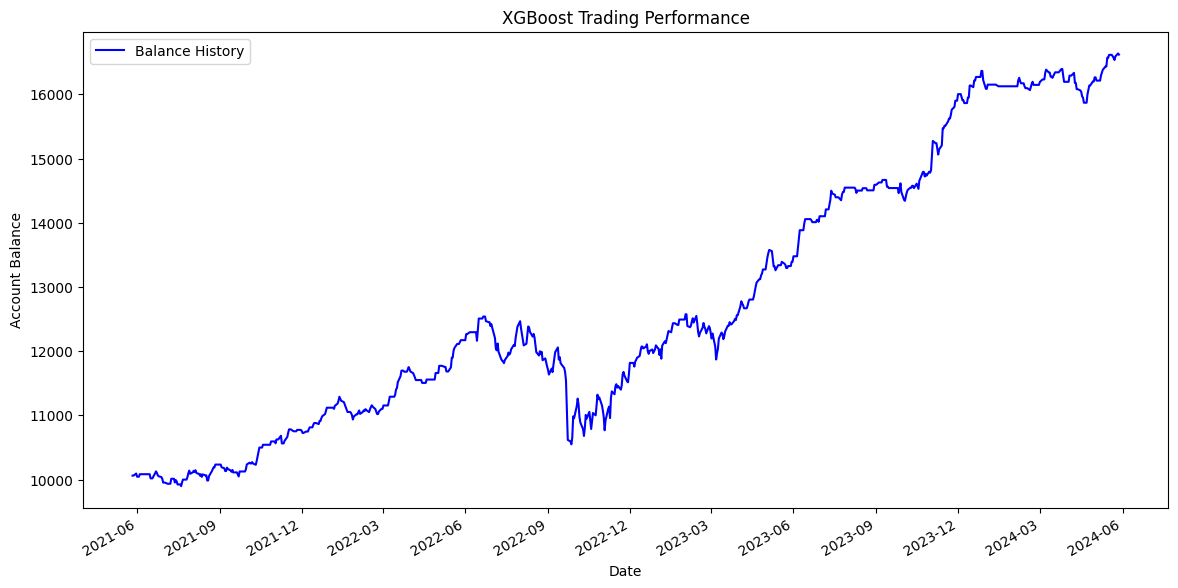

Random Forest Predictions: [1.41443108 1.41275278 1.41832286 1.41927133 1.41957375 1.41463402
 1.41379428 1.41382444 1.4160478  1.42292403]
Random Forest Actual: [1.411612 1.420374 1.418037 1.422678 1.415709 1.417193 1.410994 1.416431
 1.417656 1.414988]
Random Forest Signals: [(numpy.datetime64('2021-05-27T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-05-28T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-05-31T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-06-01T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-02T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-03T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-04T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-06-07T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-08T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-06-09T00:00:00.000000000'), 'Buy')]
Random Forest - Final Balance: 15966.39, Profit: 5966.39, Sharpe Ratio: 0.10, Max Drawdown: 0.14


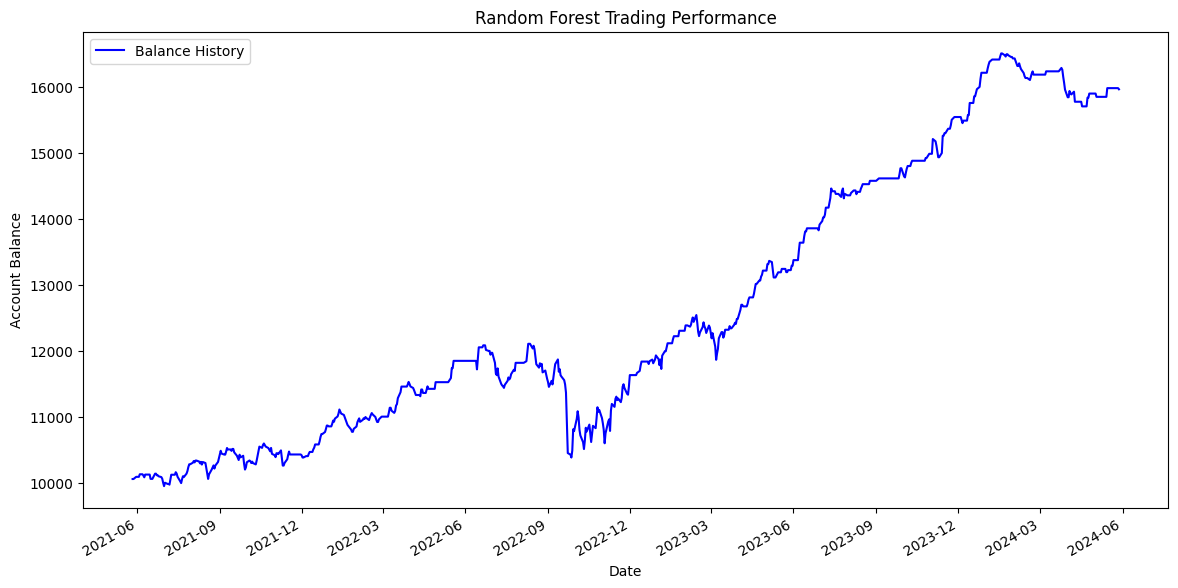

25/25 [==============================] - 0s 8ms/step
Ensemble Predictions: [1.41374087 1.41300509 1.4180126  1.41938936 1.42181503 1.41469631
 1.41489669 1.4125104  1.41448597 1.41835574]
Ensemble Actual: [1.411612 1.420374 1.418037 1.422678 1.415709 1.417193 1.410994 1.416431
 1.417656 1.414988]
Ensemble Signals: [(numpy.datetime64('2021-05-27T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-05-28T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-05-31T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-06-01T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-02T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-03T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-04T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-06-07T00:00:00.000000000'), 'Sell'), (numpy.datetime64('2021-06-08T00:00:00.000000000'), 'Buy'), (numpy.datetime64('2021-06-09T00:00:00.000000000'), 'Buy')]
Ensemble - Final Balance: 18063.25, Profit: 8063.25, Sharpe Ratio: 0.13, Max D

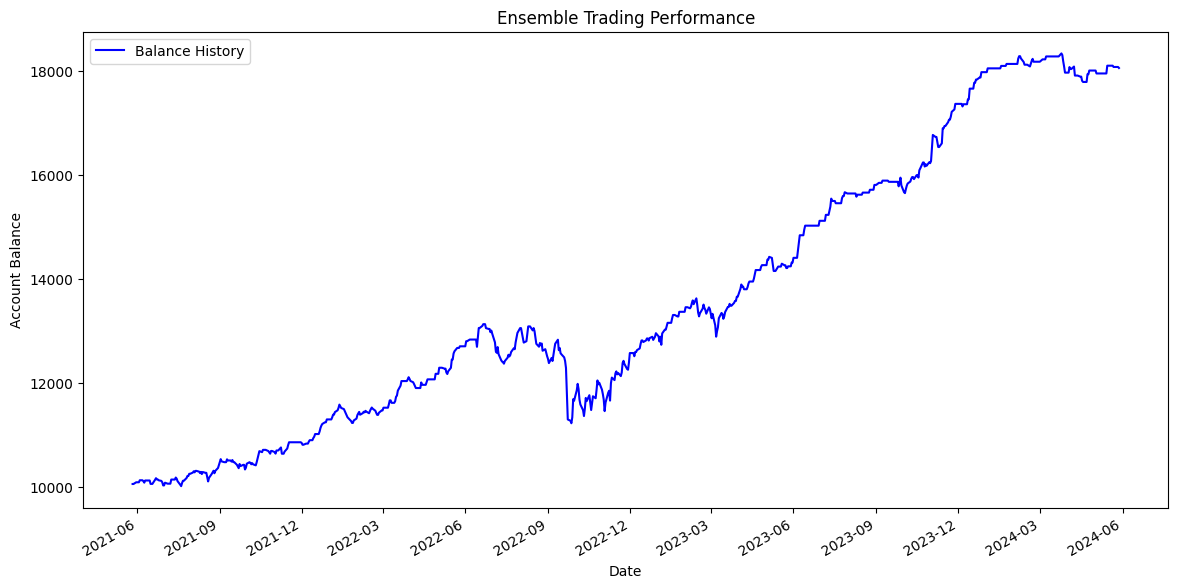

      Model       MSE       MAE      RMSE    R2      MAPE
0  Ensemble  0.000319  0.008873  0.017872  0.93  0.007438


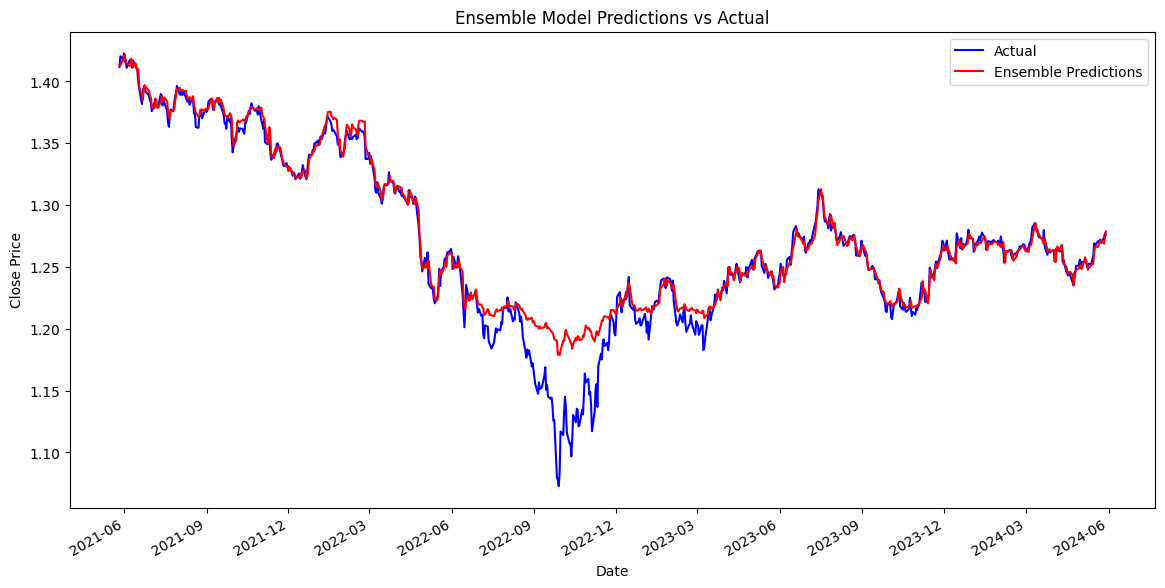

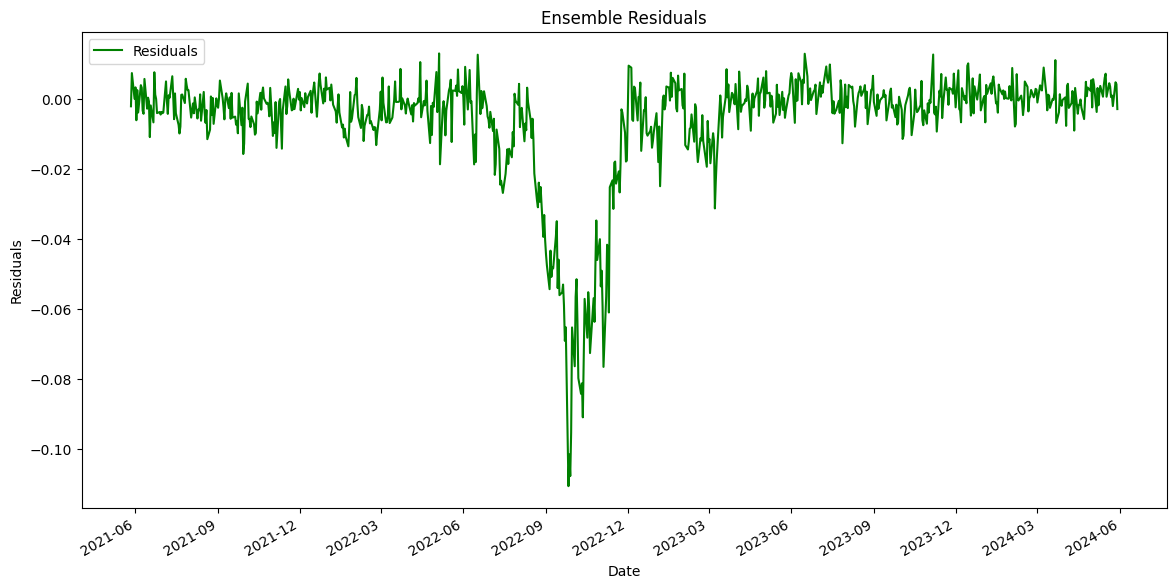

           Model       MSE       MAE      RMSE    R2      MAPE
0            GRU  0.000052  0.005152  0.007224  0.99  0.004158
1        XGBoost  0.000672  0.012270  0.025920  0.86  0.010357
2  Random Forest  0.000548  0.011318  0.023404  0.89  0.009468
3       Ensemble  0.000319  0.008873  0.017872  0.93  0.007438


In [77]:
# Load models
best_model_gru, best_model_xgb, best_model_rf = load_models()

# Evaluate each model and capture the performance metrics
final_balance_gru, profit_gru, sharpe_ratio_gru, max_drawdown_gru = evaluate_model(best_model_gru, X_test_seq, y_test_seq, scaler_y, dates_test_seq, 'GRU')
final_balance_xgb, profit_xgb, sharpe_ratio_xgb, max_drawdown_xgb = evaluate_model(best_model_xgb, X_test_seq_flat, y_test_seq_flat, scaler_y, dates_test_seq, 'XGBoost')
final_balance_rf, profit_rf, sharpe_ratio_rf, max_drawdown_rf = evaluate_model(best_model_rf, X_test_seq_flat, y_test_seq_flat, scaler_y, dates_test_seq, 'Random Forest')

# Evaluate the ensemble model
models = [(best_model_gru, 'GRU'), (best_model_xgb, 'XGBoost'), (best_model_rf, 'Random Forest')]
final_balance_ensemble, profit_ensemble, sharpe_ratio_ensemble, max_drawdown_ensemble, ensemble_metrics = evaluate_ensemble(models, X_test_seq, X_test_seq_flat, y_test_seq_flat, scaler_y, dates_test_seq)

# Add ensemble metrics to the all_metrics DataFrame
all_metrics = pd.concat([all_metrics, ensemble_metrics], ignore_index=True)

# Display the combined metrics
print(all_metrics)


### Objective 5. Comparing the models based on evaluation metrics and profitability analysis to identify the best model for the trading bot.

**1. Combining Trading Performance Metrics**

In [80]:
# Combine trading performance metrics into a DataFrame
trading_performance_df = pd.DataFrame({
    'Model': ['GRU', 'XGBoost', 'Random Forest', 'Ensemble'],
    'Final Balance': [final_balance_gru, final_balance_xgb, final_balance_rf, final_balance_ensemble],
    'Profit': [profit_gru, profit_xgb, profit_rf, profit_ensemble],
    'Sharpe Ratio': [sharpe_ratio_gru, sharpe_ratio_xgb, sharpe_ratio_rf, sharpe_ratio_ensemble],
    'Max Drawdown': [max_drawdown_gru, max_drawdown_xgb, max_drawdown_rf, max_drawdown_ensemble]
})

# Print trading performance metrics
print(trading_performance_df)


           Model  Final Balance       Profit  Sharpe Ratio  Max Drawdown
0            GRU   14715.804103  4715.804103      0.088068      0.170263
1        XGBoost   16618.537840  6618.537840      0.110074      0.158724
2  Random Forest   15966.388815  5966.388815      0.103151      0.142251
3       Ensemble   18063.249440  8063.249440      0.130932      0.145076


**2. Visualization of Model Performance**

In [81]:
# Visualization of Model Performance
def visualize_model_performance(performance_df):
    """
    Visualize the model performance metrics.

    Parameters:
    performance_df (DataFrame): DataFrame containing performance metrics for each model.

    Returns:
    None
    """
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot primary metrics
    for metric in ['MSE', 'MAE', 'RMSE', 'MAPE']:
        ax1.plot(all_metrics['Model'], all_metrics[metric], marker='o', label=metric)

    # Add secondary y-axis for R2
    ax2 = ax1.twinx()
    ax2.plot(all_metrics['Model'], all_metrics['R2'], marker='o', color='r', label='R2', linestyle='--')

    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    ax1.set_title('Model Performance Comparison')
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Metric Value')
    ax2.set_ylabel('R2 Value')

    plt.show()


**3. Visualization of Trading Performance**

In [82]:
# Visualization of Trading Performance
def visualize_trading_performance(trading_performance_df):
    """
    Visualize the trading performance metrics.

    Parameters:
    trading_performance_df (DataFrame): DataFrame containing trading performance metrics for each model.

    Returns:
    None
    """
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot primary metrics
    for metric in ['Final Balance', 'Profit']:
        ax1.plot(trading_performance_df['Model'], trading_performance_df[metric], marker='o', label=metric)

    # Add secondary y-axis for Sharpe Ratio and Max Drawdown
    ax2 = ax1.twinx()
    ax2.plot(trading_performance_df['Model'], trading_performance_df['Sharpe Ratio'], marker='o', color='g', label='Sharpe Ratio', linestyle='--')
    ax2.plot(trading_performance_df['Model'], trading_performance_df['Max Drawdown'], marker='o', color='r', label='Max Drawdown', linestyle='--')

    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    ax1.set_title('Trading Performance Comparison')
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Balance and Profit')
    ax2.set_ylabel('Sharpe Ratio and Max Drawdown')

    plt.show()


**4. Calling Visualization Functions**

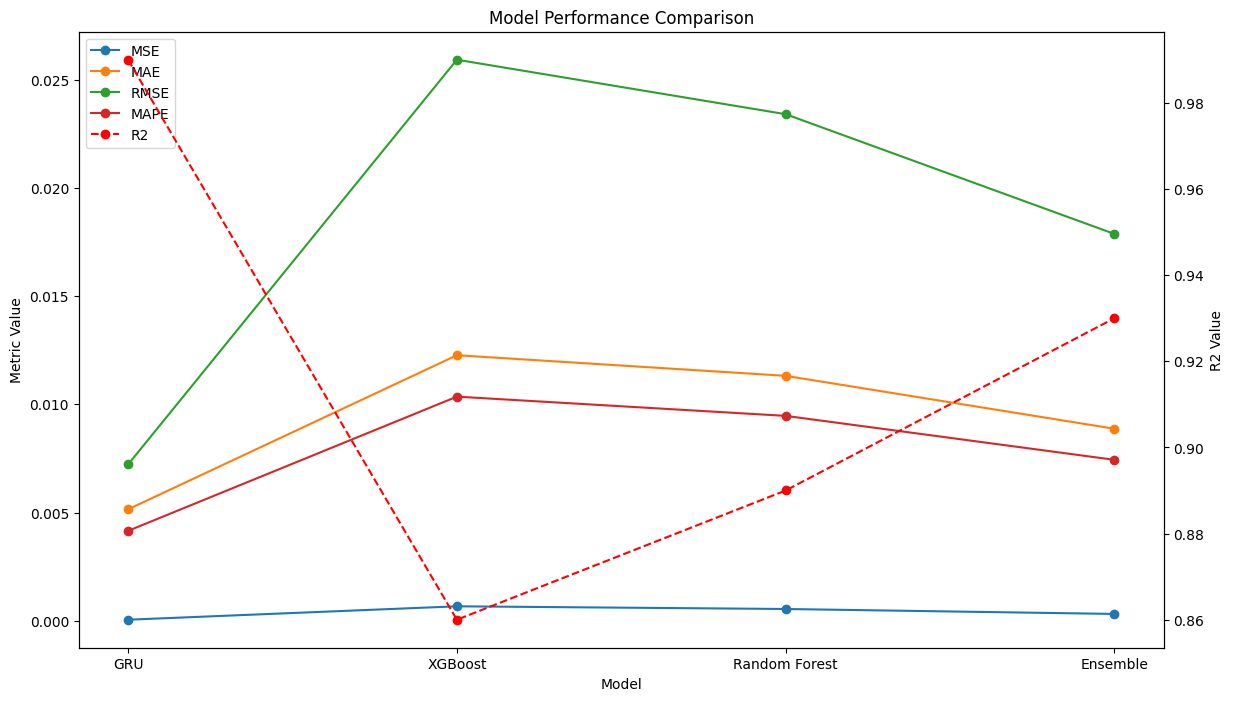

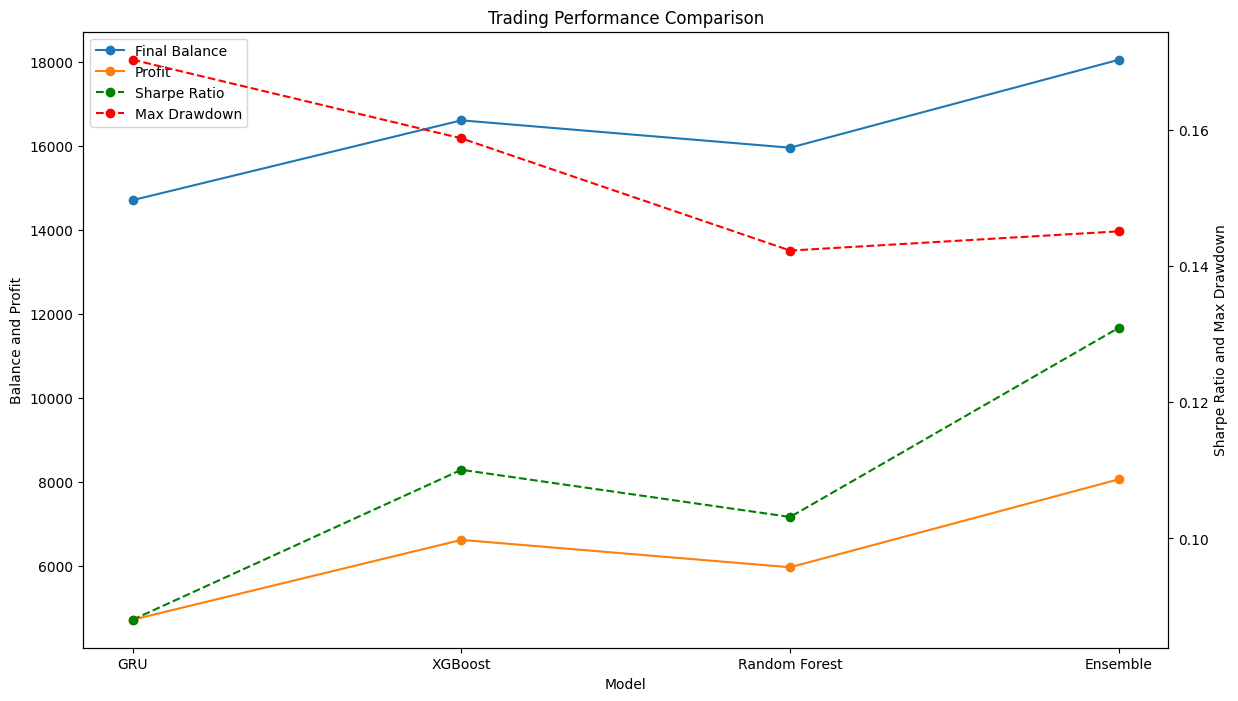

In [83]:
# Visualize the model performance
visualize_model_performance(all_metrics)

# Visualize the trading performance
visualize_trading_performance(trading_performance_df)
